In [1]:
# Import all libraries in the top so that its easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# Import Genetic CSV
# TODO:: Get it from hosted site or Host the data source somewhere
source= 'https://raw.githubusercontent.com/MIT-Assignments/MDA511-Assignment/refs/heads/main/genetics.csv'
geneticsDS = pd.read_csv(source,on_bad_lines='skip')
geneticsDS.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [3]:
geneticsDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# Drop useless columns for analytics. Some column might be needed but ignored for now
finalDF = geneticsDS.drop(['self_employed','state','work_interfere','no_employees','leave','phys_health_consequence','coworkers','supervisor','phys_health_interview','mental_vs_physical','comments','remote_work','benefits','wellness_program','anonymity'], axis=1)
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   tech_company               1259 non-null   object
 7   care_options               1259 non-null   object
 8   seek_help                  1259 non-null   object
 9   mental_health_consequence  1259 non-null   object
 10  mental_health_interview    1259 non-null   object
 11  obs_consequence            1259 non-null   object
dtypes: int64(1), object(11)
memory usage: 118.2+ KB


In [5]:
# Filter Data between age 12 to 70
geneticsDS = geneticsDS[(geneticsDS['Age'] > 12) & (geneticsDS['Age'] < 70)]
geneticsDS['Age'].min()
geneticsDS['Age'].max()
geneticsDS.describe()

Age
count  1250.000000
mean     32.044800
std       7.203076
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      65.000000

In [6]:
addictionDS = pd.read_csv('https://raw.githubusercontent.com/MIT-Assignments/MDA511-Assignment/refs/heads/main/addiction.csv')
addictionDS.head()

Experimentation Academic_Performance_Decline Social_Isolation  \
0             Yes                           No               No   
1              No                          Yes              NaN   
2              No                           No               No   
3             Yes                           No              Yes   
4             Yes                          Yes               No   

  Financial_Issues Physical_Mental_Health_Problems Legal_Consequences  \
0              Yes                              No                 No   
1              Yes                             Yes                Yes   
2               No                              No                Yes   
3              Yes                              No                Yes   
4              NaN                              No                Yes   

  Relationship_Strain Risk_Taking_Behavior Withdrawal_Symptoms  \
0                  No                  Yes                  No   
1                 Yes                  Yes                 Yes   
2                 Yes                  Yes                  No   
3                  No                   No                  No   
4                 Yes                  Yes                  No   

  Denial_and_Resistance_to_Treatment Addiction_Class  
0                                 No              No  
1                                 No             Yes  
2                                 No              No  
3                                Yes             Yes  
4                                 No             Yes

In [7]:
addictionDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [8]:
socialMediaDS = pd.read_csv('https://raw.githubusercontent.com/MIT-Assignments/MDA511-Assignment/refs/heads/main/socialmedia.csv')
socialMediaDS.head()

Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \
0                         Yes   
1                         Yes   
2                         Yes   
3                         Yes   
4                         Yes   

  7. What social media platforms do you commonly use?  \
0  Facebook, Twitter, Instagram, YouTube, Discord...    
1  Facebook, Twitter, Instagram, YouTube, Discord...    
2            Facebook, Instagram, YouTube, Pinterest    
3                                Facebook, Instagram    
4                       Facebook, Instagram, YouTube    

  8. What is the average time you spend on social media every day?  \
0                              Between 2 and 3 hours                 
1                                  More than 5 hours                 
2                              Between 3 and 4 hours                 
3                                  More than 5 hours                 
4                              Between 2 and 3 hours                 

   9. How often do you find yourself using Social media without a specific purpose?  \
0                                                  5                                  
1                                                  4                                  
2                                                  3                                  
3                                                  4                                  
4                                                  3                                  

   ...  11. Do you feel restless if you haven't used Social media in a while?  \
0  ...                                                  2                       
1  ...                                                  2                       
2  ...                                                  1                       
3  ...                                                  1                       
4  ...                                                  4                       

   12. On a scale of 1 to 5, how easily distracted are you?  \
0                                                  5          
1                                                  4          
2                                                  2          
3                                                  3          
4                                                  4          

   13. On a scale of 1 to 5, how much are you bothered by worries?  \
0                                                  2                 
1                                                  5                 
2                                                  5                 
3                                                  5                 
4                                                  5                 

   14. Do you find it difficult to concentrate on things?  \
0                                                  5        
1                                                  4        
2                                                  4        
3                          

In [9]:
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [10]:
# Rename the feature to technical words
column_dict = {
    '1. What is your age?':'Age',
    '2. Gender':'Gender',
    '3. Relationship Status':'Relationship',
    '4. Occupation Status':'Occupation',
    '6. Do you use social media?':'Social_media_use',
    '7. What social media platforms do you commonly use?':'Social_media_type',
    '8. What is the average time you spend on social media every day?':'Social_media_usage',
    "11. Do you feel restless if you haven't used Social media in a while?":'Restless',
    '12. On a scale of 1 to 5, how easily distracted are you?':'Distracted_rating',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleepless_rating',
    "18. How often do you feel depressed or down?":'Depressed_rating'
    
}
socialMediaDS = socialMediaDS.rename(columns=column_dict)


In [11]:
# Drop the unused or unecessary features that are not actually related to depression or has other feature relevant to it
socialMediaDS = socialMediaDS.drop([
    '5. What type of organizations are you affiliated with?',
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?",
    "17. How often do you look to seek validation from features of social media?",
    "9. How often do you find yourself using Social media without a specific purpose?",
    "14. Do you find it difficult to concentrate on things?"
],axis=1)

In [12]:
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           481 non-null    object 
 1   Age                 481 non-null    float64
 2   Gender              481 non-null    object 
 3   Relationship        481 non-null    object 
 4   Occupation          481 non-null    object 
 5   Social_media_use    481 non-null    object 
 6   Social_media_type   481 non-null    object 
 7   Social_media_usage  481 non-null    object 
 8   Restless            481 non-null    int64  
 9   Distracted_rating   481 non-null    int64  
 10  Depressed_rating    481 non-null    int64  
 11  Sleepless_rating    481 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 45.2+ KB


In [13]:
# Make a function that will select a probability of family history according to age
# Function to select rows based on probability for each Age
def select_row_based_on_history(group):
    # Split the group into 'Yes' and 'No' rows
    yes_rows = group[group['family_history'] == 'Yes']
    no_rows = group[group['family_history'] == 'No']
    
    # If there are both 'Yes' and 'No' values for the same Age
    if not yes_rows.empty and not no_rows.empty:
        # Choose between 'Yes' and 'No' with 40% probability for 'Yes' and 60% for 'No'
        chosen_value = np.random.choice(['Yes', 'No'], p=[0.5, 0.5])
        
        if chosen_value == 'Yes':
            return yes_rows.iloc[0]  # Keep the first 'Yes' row
        else:
            return no_rows.iloc[0]  # Keep the first 'No' row
    elif not yes_rows.empty:
        return yes_rows.iloc[0]  # Keep the first 'Yes' row if no 'No' exists
    else:
        return no_rows.iloc[0]  # Keep the first 'No' row if no 'Yes' exists

In [14]:
# Reset index for the table
finalDF=finalDF.reset_index(drop=True)
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   tech_company               1259 non-null   object
 7   care_options               1259 non-null   object
 8   seek_help                  1259 non-null   object
 9   mental_health_consequence  1259 non-null   object
 10  mental_health_interview    1259 non-null   object
 11  obs_consequence            1259 non-null   object
dtypes: int64(1), object(11)
memory usage: 118.2+ KB


In [15]:
# Check if there is any null or na values in dataset
finalDF.isnull().sum()
finalDF.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
tech_company                 0
care_options                 0
seek_help                    0
mental_health_consequence    0
mental_health_interview      0
obs_consequence              0
dtype: int64

In [16]:
# Apply the function to each group (grouped by 'Age')
finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_history)

# Reset index and ensure no redundant columns
finalDF_suitable = finalDF_suitable.reset_index(drop=True)
finalDF_suitable.shape[0]
finalDF.head()

/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_57056/755920339.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_history)


Timestamp  Age  Gender         Country family_history treatment  \
0  2014-08-27 11:29:31   37  Female   United States             No       Yes   
1  2014-08-27 11:29:37   44       M   United States             No        No   
2  2014-08-27 11:29:44   32    Male          Canada             No        No   
3  2014-08-27 11:29:46   31    Male  United Kingdom            Yes       Yes   
4  2014-08-27 11:30:22   31    Male   United States             No        No   

  tech_company care_options   seek_help mental_health_consequence  \
0          Yes     Not sure         Yes                        No   
1           No           No  Don't know                     Maybe   
2          Yes           No          No                        No   
3          Yes          Yes          No                       Yes   
4          Yes           No  Don't know                        No   

  mental_health_interview obs_consequence  
0                      No              No  
1                      No              No  
2                     Yes              No  
3                   Maybe             Yes  
4                     Yes              No

In [17]:
# Check the data structure of Social Media Dataset
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           481 non-null    object 
 1   Age                 481 non-null    float64
 2   Gender              481 non-null    object 
 3   Relationship        481 non-null    object 
 4   Occupation          481 non-null    object 
 5   Social_media_use    481 non-null    object 
 6   Social_media_type   481 non-null    object 
 7   Social_media_usage  481 non-null    object 
 8   Restless            481 non-null    int64  
 9   Distracted_rating   481 non-null    int64  
 10  Depressed_rating    481 non-null    int64  
 11  Sleepless_rating    481 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 45.2+ KB


In [18]:
# Filter data between age 12 to 70 because there is an outlier for age which we will remove from the dataset
socialMediaDS = socialMediaDS[(socialMediaDS['Age']>12) & (socialMediaDS['Age']<70)]

In [19]:
# Make sure there are datas that are higher than age 50
(socialMediaDS['Age']>50).value_counts()

Age
False    470
True      10
Name: count, dtype: int64

In [20]:
# See all genders in dataset
print(socialMediaDS['Gender'].unique())

['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [21]:
# Transformation of Gender data into Male, Female and Others. The data contains other values are well so we will be transforming these data to others.
socialMediaDS['Gender'] = socialMediaDS['Gender'].str.lower().map({'male':'Male','Nonbinary':'Male','female':'Female'}).fillna('Others')
print(socialMediaDS['Gender'].unique())

['Male' 'Female' 'Others']


In [22]:
# Aggregrating number of genders in dataset
count = socialMediaDS['Gender'].value_counts().loc[['Male', 'Female','Others']]
print(count)

Gender
Male      211
Female    262
Others      7
Name: count, dtype: int64


In [23]:
# Describing the dataset of socialmedia
socialMediaDS.describe()

Age    Restless  Distracted_rating  Depressed_rating  \
count  480.000000  480.000000         480.000000        480.000000   
mean    26.001458    2.585417           3.347917          3.252083   
std      9.471690    1.256713           1.176402          1.311979   
min     13.000000    1.000000           1.000000          1.000000   
25%     21.000000    2.000000           3.000000          2.000000   
50%     22.000000    2.000000           3.000000          3.000000   
75%     26.000000    3.000000           4.000000          4.000000   
max     69.000000    5.000000           5.000000          5.000000   

       Sleepless_rating  
count        480.000000  
mean           3.197917  
std            1.460830  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            5.000000  
max            5.000000

In [24]:
# Cbecking if there is na or null values in the dataset
socialMediaDS.isnull().sum()
socialMediaDS.isna().sum()

Timestamp             0
Age                   0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [25]:
# Exploring different type of Relationship status of the dataset
socialMediaDS['Relationship'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [26]:
# Transforming data of age from float value to integer so that we can combine or merge the fata
socialMediaDS['Age'] = socialMediaDS['Age'].astype(int)

In [27]:
# Merge two datasets using age
merged_df = pd.merge(finalDF_suitable[['Age', 'family_history']],socialMediaDS, on='Age',how='inner')
# Checking the columns and number of rows in dataset
mrows = merged_df.shape[0]
mcols = merged_df.shape[1]
print(mrows,mcols)

459 13


In [28]:
# Validating the final dataset by checking any na or null values
merged_df.isnull().sum()
merged_df.isna().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [29]:
# Count of people according to type of family history
counts = merged_df.groupby('family_history')['family_history'].count()
print(counts)

family_history
No     245
Yes    214
Name: family_history, dtype: int64


In [30]:
# Confirming the dataset has data of people which has higher age than 50
merged_df.columns
(merged_df['Age']>50).value_counts()

Age
False    451
True       8
Name: count, dtype: int64

In [31]:
# Writing a function to derive trauma from the data in dataset such as family_history, restless, Sleepless_rating
def calculateChildhoodTrauma(row):
    random_value = np.random.rand()
    if(random_value > 0.5):
        threshold =  (row['Restless']>3 and row['Sleepless_rating']>3)  or row['family_history']=='Yes'
        return threshold
    else:
        return False


In [32]:
# Applying new feature which is Trauma in dataset using the above function
merged_df['Trauma'] = merged_df.apply(calculateChildhoodTrauma, axis=1)

In [33]:
# Making sure there is no na or null values after merge
merged_df.isna().sum()
merged_df.isnull().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
Trauma                0
dtype: int64

In [34]:
# Counting the number of users that are using social media
counts = merged_df.groupby('Social_media_use')['Social_media_use'].count()
print(counts)

Social_media_use
No       3
Yes    456
Name: Social_media_use, dtype: int64


In [35]:
# Counting the number of users that has trauma
merged_df.groupby('Trauma')['Trauma'].count()

Trauma
False    330
True     129
Name: Trauma, dtype: int64

In [36]:
# Defining functions to derive addiction risk leve from two datasets addiction and the merged dataset
# Define heuristic rules for addiction risk for main dataset
def derive_addiction_level(row):
    if ((row["Sleepless_rating"] > 3) or (row['Restless']==1)) and row["Trauma"] == True and row["Depressed_rating"] > 3:
        return "Likely Addicted"
    elif row["Distracted_rating"] > 3 and row["Depressed_rating"] > 3:
        return "At Risk"
    else:
        return "Low Risk"

# Derive Risk_Level based on existing columns for addiction dataset
def derive_risk_level(row):
    if row["Addiction_Class"] == "Yes":
        return "Likely Addicted"
    elif row["Experimentation"] == "Yes" and row["Social_Isolation"] == "Yes":
        return "At Risk"
    else:
        return "Low Risk"

In [37]:
# Generating or Deriving the Addiction_Risk feature in merged dataset
merged_df['Addiction_Risk'] = merged_df.apply(derive_addiction_level, axis=1)
merged_df.head(5)
merged_df.groupby('Addiction_Risk')['Addiction_Risk'].count()

Addiction_Risk
At Risk             94
Likely Addicted     50
Low Risk           315
Name: Addiction_Risk, dtype: int64

In [38]:
# Counting the number of risks in addiction Dataset
addictionDS['Addiction_Risk'] =  addictionDS.apply(derive_risk_level, axis=1)

In [39]:
# Dropping all na values from the dataset
addictionDS = addictionDS.dropna()

In [40]:
# Checking if there are any row or data that has null or na values
addictionDS.isnull().sum()
addictionDS.shape[1]
addictionDS.isna().sum()

Experimentation                       0
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
Addiction_Risk                        0
dtype: int64

In [41]:
# Define a function to look up the corresponding 'Addiction_Class' from addictionDS based on 'Addiction_Risk'
def get_addiction_class(risk_value):
    # Use `loc` to find the corresponding 'Addiction_Class' for the 'Addiction_Risk'
    result = addictionDS.loc[addictionDS['Addiction_Risk'] == risk_value,['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']]
    # If a match is found, return the value; otherwise, return NaN
    return result.iloc[0] if not result.empty else None

# Apply the function to each row of merged_df to create a new column 'Addiction_Class'
merged_df[['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']] = merged_df['Addiction_Risk'].apply(get_addiction_class)

# Check the result
merged_df.head()

Age family_history           Timestamp  Gender Relationship  \
0   18            Yes  4/18/2022 20:53:37  Female       Single   
1   18            Yes  4/18/2022 23:12:03  Female       Single   
2   18            Yes   4/19/2022 0:10:02  Others       Single   
3   18            Yes   4/19/2022 2:18:48  Female       Single   
4   18            Yes  5/11/2022 22:03:42  Female       Single   

           Occupation Social_media_use  \
0      School Student              Yes   
1  University Student              Yes   
2      School Student              Yes   
3  University Student              Yes   
4  University Student              Yes   

                                   Social_media_type     Social_media_usage  \
0   Facebook, Instagram, YouTube, Discord, Pinterest  Between 2 and 3 hours   
1            Facebook, Instagram, YouTube, Pinterest      More than 5 hours   
2        Twitter, Instagram, YouTube, Reddit, TikTok  Between 2 and 3 hours   
3                          Facebook, YouTube, Reddit  Between 3 and 4 hours   
4  Facebook, Instagram, YouTube, Snapchat, Discor...      More than 5 hours   

   Restless  Distracted_rating  Depressed_rating  Sleepless_rating  Trauma  \
0         3                  3                 3                 2    True   
1         3                  5                 5                 5   False   
2         2                  3                 4                 4   False   
3         3                  3                 5                 5   False   
4         2                  2                 2                 4    True   

  Addiction_Risk Addiction_Class Social_Isolation Withdrawal_Symptoms  
0       Low Risk              No               No                  No  
1        At Risk              No              Yes                  No  
2       Low Risk              No               No                  No  
3       Low Risk              No               No                  No  
4       Low Risk              No               No                  No

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  459 non-null    int64 
 1   family_history       459 non-null    object
 2   Timestamp            459 non-null    object
 3   Gender               459 non-null    object
 4   Relationship         459 non-null    object
 5   Occupation           459 non-null    object
 6   Social_media_use     459 non-null    object
 7   Social_media_type    459 non-null    object
 8   Social_media_usage   459 non-null    object
 9   Restless             459 non-null    int64 
 10  Distracted_rating    459 non-null    int64 
 11  Depressed_rating     459 non-null    int64 
 12  Sleepless_rating     459 non-null    int64 
 13  Trauma               459 non-null    bool  
 14  Addiction_Risk       459 non-null    object
 15  Addiction_Class      459 non-null    object
 16  Social_I

In [43]:
# Make a list to define range into float number
usage = {
    'Between 2 and 3 hours':2.5, 
    'More than 5 hours':5.5,
    'Between 3 and 4 hours':3.5, 
    'Between 1 and 2 hours':1.5,
    'Between 4 and 5 hours':4.5, 
    'Less than an Hour':0.5
    }
def getAverageUsage(val):
    return usage[val]


In [44]:
# Split the string by comma and return the length of the total list after sepeartion
def getNumberOfSocialMediaType(val):
    return len(val.split(', '));

In [45]:
# Make a new feature or column for social media average usage
merged_df['Social_media_avg_use']=merged_df['Social_media_usage'].map(getAverageUsage)

In [46]:
# Make a new column to calculate the number of social media a person usage
merged_df['no_social_media_type']=merged_df['Social_media_type'].map(getNumberOfSocialMediaType)

In [47]:
categorial_columns=merged_df.select_dtypes(include=['object']).columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

In [48]:
# Stats Description of the merged data
merged_df.describe()

Age    Restless  Distracted_rating  Depressed_rating  \
count  459.000000  459.000000         459.000000        459.000000   
mean    26.278867    2.590414           3.344227          3.261438   
std      9.147781    1.265082           1.183596          1.310545   
min     18.000000    1.000000           1.000000          1.000000   
25%     21.000000    2.000000           3.000000          2.000000   
50%     22.000000    2.000000           3.000000          3.000000   
75%     26.000000    3.000000           4.000000          4.000000   
max     65.000000    5.000000           5.000000          5.000000   

       Sleepless_rating  Social_media_avg_use  no_social_media_type  
count        459.000000            459.000000            459.000000  
mean           3.202614              3.397603              4.291939  
std            1.456919              1.594332              1.977427  
min            1.000000              0.500000              1.000000  
25%            2.000000              2.500000              3.000000  
50%            3.000000              3.500000              4.000000  
75%            5.000000              4.500000              6.000000  
max            5.000000              5.500000              9.000000

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   459 non-null    int64  
 1   family_history        459 non-null    object 
 2   Timestamp             459 non-null    object 
 3   Gender                459 non-null    object 
 4   Relationship          459 non-null    object 
 5   Occupation            459 non-null    object 
 6   Social_media_use      459 non-null    object 
 7   Social_media_type     459 non-null    object 
 8   Social_media_usage    459 non-null    object 
 9   Restless              459 non-null    int64  
 10  Distracted_rating     459 non-null    int64  
 11  Depressed_rating      459 non-null    int64  
 12  Sleepless_rating      459 non-null    int64  
 13  Trauma                459 non-null    bool   
 14  Addiction_Risk        459 non-null    object 
 15  Addiction_Class       4

In [50]:
# Describe numerical values
numeric_summary = merged_df.describe().T
print(numeric_summary)

                      count       mean       std   min   25%   50%   75%   max
Age                   459.0  26.278867  9.147781  18.0  21.0  22.0  26.0  65.0
Restless              459.0   2.590414  1.265082   1.0   2.0   2.0   3.0   5.0
Distracted_rating     459.0   3.344227  1.183596   1.0   3.0   3.0   4.0   5.0
Depressed_rating      459.0   3.261438  1.310545   1.0   2.0   3.0   4.0   5.0
Sleepless_rating      459.0   3.202614  1.456919   1.0   2.0   3.0   5.0   5.0
Social_media_avg_use  459.0   3.397603  1.594332   0.5   2.5   3.5   4.5   5.5
no_social_media_type  459.0   4.291939  1.977427   1.0   3.0   4.0   6.0   9.0


In [51]:
# Calculating variance and skewness of data structure
stats = pd.DataFrame({
    'Variance':merged_df[numerical_columns].var(),
    'Skewness':merged_df[numerical_columns].skew()
})
print(stats)

                       Variance  Skewness
Age                   83.681889  1.821757
Restless               1.600432  0.351164
Distracted_rating      1.400900 -0.184237
Depressed_rating       1.717527 -0.240803
Sleepless_rating       2.122613 -0.202624
Social_media_avg_use   2.541894 -0.120606
no_social_media_type   3.910219  0.308033


In [52]:
# Coorelation between numerical columns
merged_df[numerical_columns].corr()

Age  Restless  Distracted_rating  Depressed_rating  \
Age                   1.000000 -0.193305          -0.273460         -0.391105   
Restless             -0.193305  1.000000           0.520156          0.328115   
Distracted_rating    -0.273460  0.520156           1.000000          0.427478   
Depressed_rating     -0.391105  0.328115           0.427478          1.000000   
Sleepless_rating     -0.225742  0.165956           0.293737          0.366714   
Social_media_avg_use -0.396706  0.408923           0.338065          0.344096   
no_social_media_type -0.315804  0.079324           0.161272          0.212288   

                      Sleepless_rating  Social_media_avg_use  \
Age                          -0.225742             -0.396706   
Restless                      0.165956              0.408923   
Distracted_rating             0.293737              0.338065   
Depressed_rating              0.366714              0.344096   
Sleepless_rating              1.000000              0.172509   
Social_media_avg_use          0.172509              1.000000   
no_social_media_type          0.165103              0.244279   

                      no_social_media_type  
Age                              -0.315804  
Restless                          0.079324  
Distracted_rating                 0.161272  
Depressed_rating                  0.212288  
Sleepless_rating                  0.165103  
Social_media_avg_use              0.244279  
no_social_media_type              1.000000

In [53]:
# Counting the number of users that has trauma
for cat in categorial_columns:
    if cat!='Timestamp':
        print('Category of ',merged_df.groupby(cat)[cat].count(),'\n')

Category of  family_history
No     245
Yes    214
Name: family_history, dtype: int64 

Category of  Gender
Female    257
Male      197
Others      5
Name: Gender, dtype: int64 

Category of  Relationship
Divorced               6
In a relationship     88
Married              100
Single               265
Name: Relationship, dtype: int64 

Category of  Occupation
Retired                 8
Salaried Worker       130
School Student         30
University Student    291
Name: Occupation, dtype: int64 

Category of  Social_media_use
No       3
Yes    456
Name: Social_media_use, dtype: int64 

Category of  Social_media_type
Discord, Reddit                        3
Facebook                              18
Facebook, Discord, Reddit              1
Facebook, Instagram                   10
Facebook, Instagram, Discord           2
                                      ..
YouTube, Discord, Reddit               4
YouTube, Pinterest                     1
YouTube, Reddit                        3
YouTube, 

In [54]:
merged_df.columns

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms',
       'Social_media_avg_use', 'no_social_media_type'],
      dtype='object')

In [55]:
print(merged_df[['Age', 'Depressed_rating']].corr())

                       Age  Depressed_rating
Age               1.000000         -0.391105
Depressed_rating -0.391105          1.000000


In [56]:
# Correlation between age and depressed rating
corr, p_value = pearsonr(merged_df['Age'], merged_df['Depressed_rating'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: -0.3911045585378523, P-value: 3.162868332304329e-18


In [57]:
# Outlier detection using zscore
from scipy.stats import zscore

for col in numerical_columns:
    z = zscore(merged_df[col])
    outliers = z.abs() > 3
    oc = outliers[outliers==True].sum()
    print('Outliers',col,oc)

Outliers Age 5
Outliers Restless 0
Outliers Distracted_rating 0
Outliers Depressed_rating 0
Outliers Sleepless_rating 0
Outliers Social_media_avg_use 0
Outliers no_social_media_type 0


In [58]:
# Detect outliers using IQR
print(numerical_columns)
Q1 = merged_df[numerical_columns].quantile(0.25)
Q3 = merged_df[numerical_columns].quantile(0.84)

IQR = Q3 - Q1
for num in numerical_columns:
    # Identify outliers for the specific column
    outliers_column = (merged_df[num] < (Q1[num] - 1.5 * IQR[num])) | \
                  (merged_df[num] > (Q3[num] + 1.5 * IQR[num]))
    # Count the number of outlier rows
    outlier_count = outliers_column[outliers_column==True].sum()
    print(f"\nNumber of outliers in column '{num}': {outlier_count}")

Index(['Age', 'Restless', 'Distracted_rating', 'Depressed_rating',
       'Sleepless_rating', 'Social_media_avg_use', 'no_social_media_type'],
      dtype='object')

Number of outliers in column 'Age': 5

Number of outliers in column 'Restless': 0

Number of outliers in column 'Distracted_rating': 0

Number of outliers in column 'Depressed_rating': 0

Number of outliers in column 'Sleepless_rating': 0

Number of outliers in column 'Social_media_avg_use': 0

Number of outliers in column 'no_social_media_type': 0


In [59]:
# Calculating key measures
central_dispersion = pd.DataFrame({
    'Mean': merged_df[numerical_columns].mean(),
    'Median': merged_df[numerical_columns].median(),
    'Variance': merged_df[numerical_columns].var(),
    'Standard Deviation': merged_df[numerical_columns].std(),
    'Min': merged_df[numerical_columns].min(),
    'Max': merged_df[numerical_columns].max()
})

print("\nCentral Tendency and Dispersion:")
print(central_dispersion)


Central Tendency and Dispersion:
                           Mean  Median   Variance  Standard Deviation   Min  \
Age                   26.278867    22.0  83.681889            9.147781  18.0   
Restless               2.590414     2.0   1.600432            1.265082   1.0   
Distracted_rating      3.344227     3.0   1.400900            1.183596   1.0   
Depressed_rating       3.261438     3.0   1.717527            1.310545   1.0   
Sleepless_rating       3.202614     3.0   2.122613            1.456919   1.0   
Social_media_avg_use   3.397603     3.5   2.541894            1.594332   0.5   
no_social_media_type   4.291939     4.0   3.910219            1.977427   1.0   

                       Max  
Age                   65.0  
Restless               5.0  
Distracted_rating      5.0  
Depressed_rating       5.0  
Sleepless_rating       5.0  
Social_media_avg_use   5.5  
no_social_media_type   9.0  


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Restless'}>,
        <Axes: title={'center': 'Distracted_rating'}>],
       [<Axes: title={'center': 'Depressed_rating'}>,
        <Axes: title={'center': 'Sleepless_rating'}>,
        <Axes: title={'center': 'Social_media_avg_use'}>],
       [<Axes: title={'center': 'no_social_media_type'}>, <Axes: >,
        <Axes: >]], dtype=object)

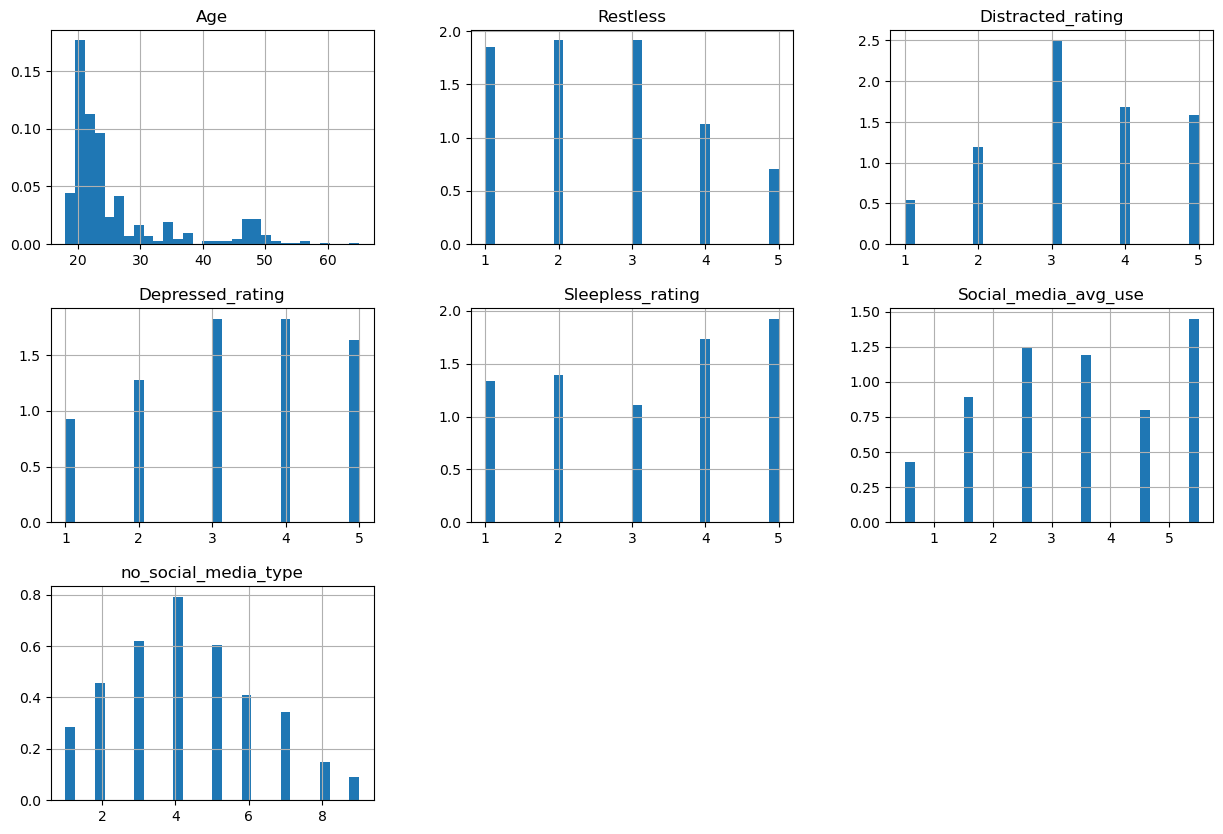

In [60]:
# Histogram for all numnerical features (Bivariate)
merged_df.hist(bins=30, figsize=(15, 10), density=True)

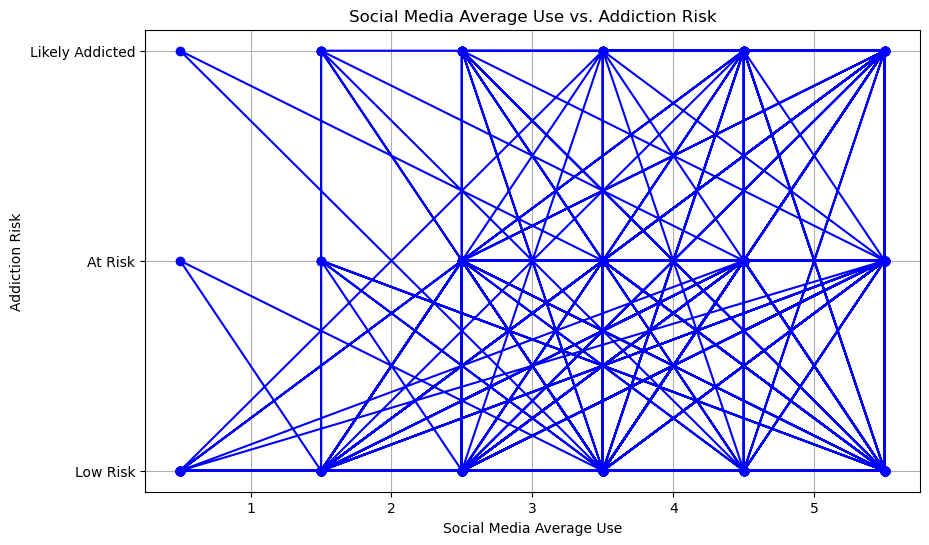

In [61]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Social_media_avg_use'], merged_df['Addiction_Risk'], marker='o', linestyle='-', color='blue')

# Customize the chart
plt.title('Social Media Average Use vs. Addiction Risk')
plt.xlabel('Social Media Average Use')
plt.ylabel('Addiction Risk')
plt.grid(True)

# Show the plot
plt.show()


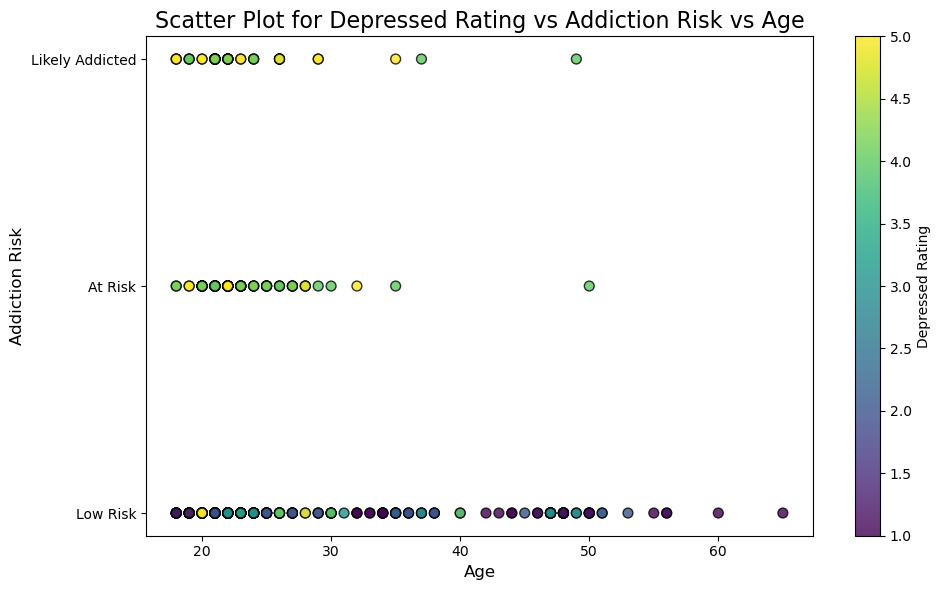

In [62]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    merged_df['Age'],  # X-axis
    merged_df['Addiction_Risk'],  # Y-axis
    s=50,  # Scale marker size
    c=merged_df['Depressed_rating'],  # Color based on depression rating
    cmap='viridis',  # Color map
    alpha=0.8,  # Transparency
    edgecolor='k'
)
# Add colorbar and labels
plt.colorbar(sc, label='Depressed Rating')
plt.title("Scatter Plot for Depressed Rating vs Addiction Risk vs Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Addiction Risk", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: >

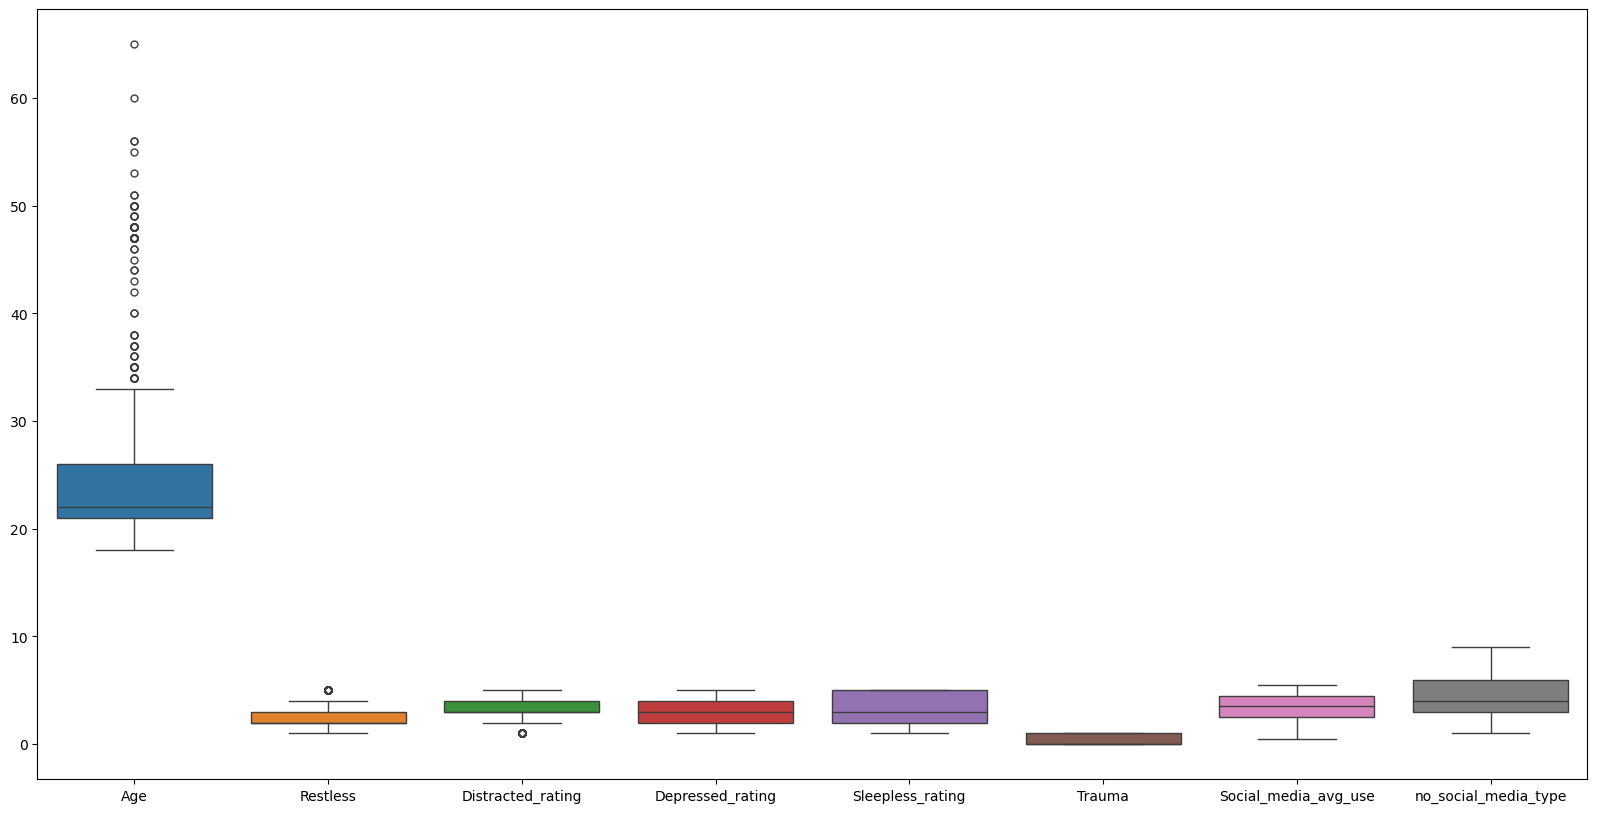

In [63]:
# Box plot for all numerical values in dataset (Univariate)
plt.figure(figsize=(20, 10))
sns.boxplot(data=merged_df,fliersize=5)

Text(0.5, 1.0, 'Coorelation Heatmap')

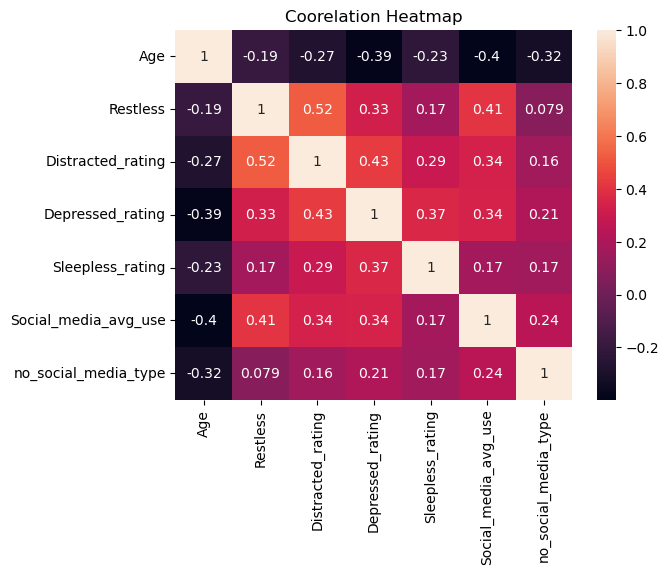

In [64]:
# Correlation heatmap
coorelation_matrix=merged_df[numerical_columns].corr()
sns.heatmap(coorelation_matrix,annot=True)
plt.title('Coorelation Heatmap')

Index(['Age', 'Restless', 'Distracted_rating', 'Depressed_rating',
       'Sleepless_rating', 'Social_media_avg_use', 'no_social_media_type'],
      dtype='object')


<Figure size 2000x1200 with 0 Axes>

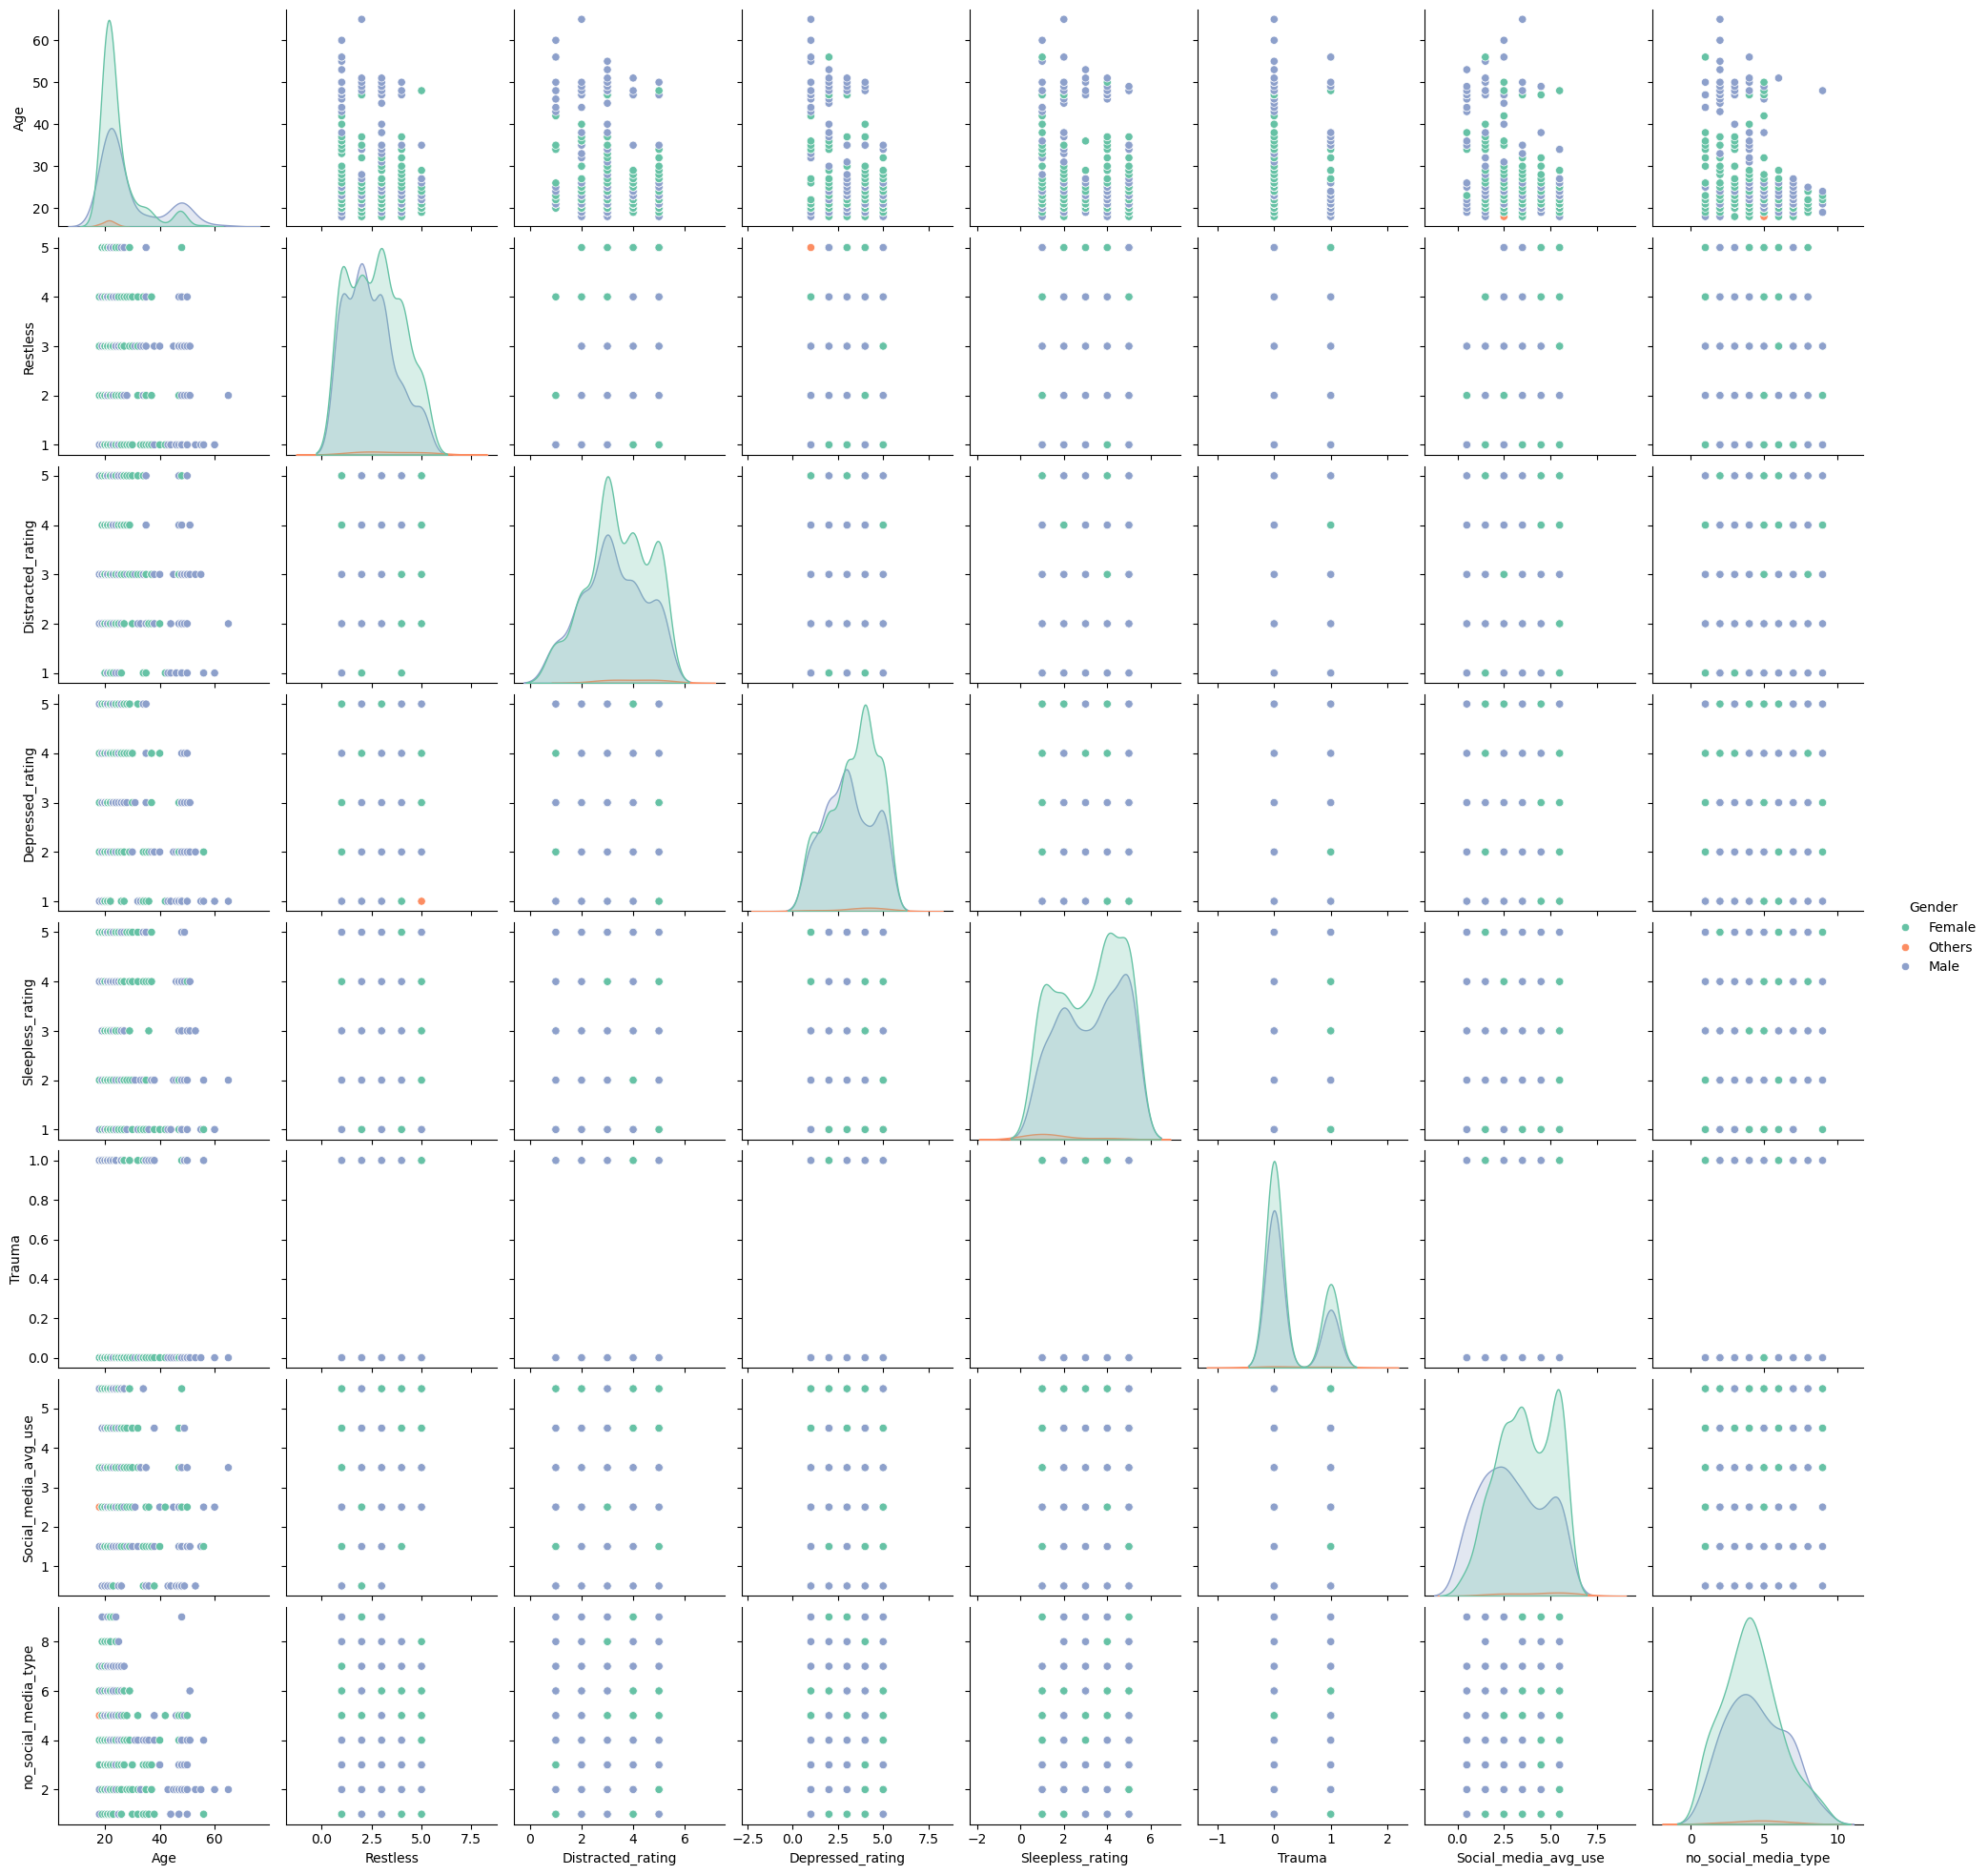

In [65]:
# Bivariate Diagrams
# Create a scatter plot matrix using seaborn
plt.figure(figsize=(20, 12))
print(numerical_columns)
sns.pairplot(merged_df,palette='Set2',hue='Gender')
plt.show()

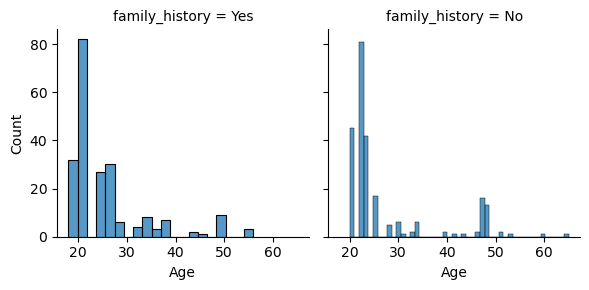

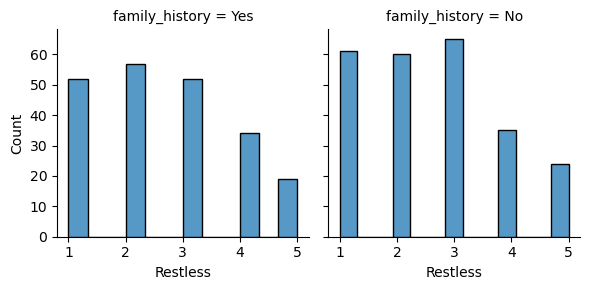

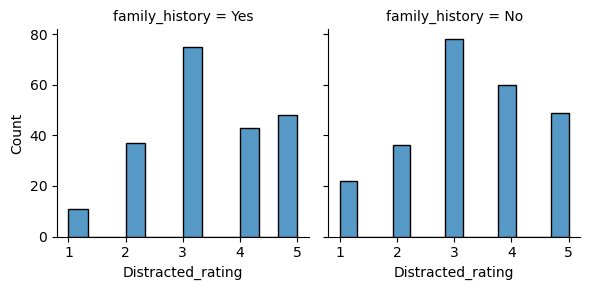

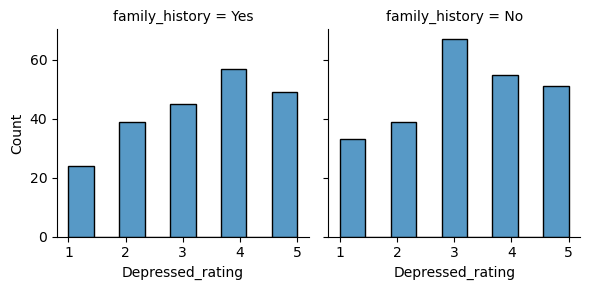

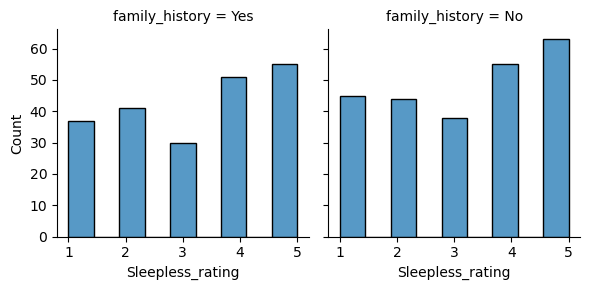

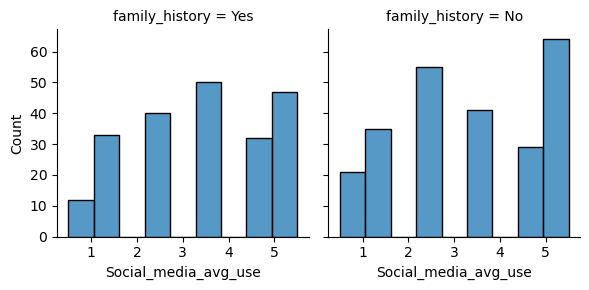

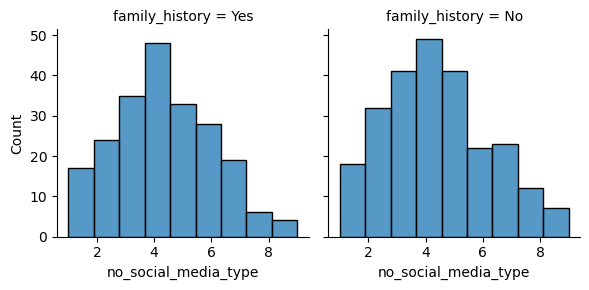

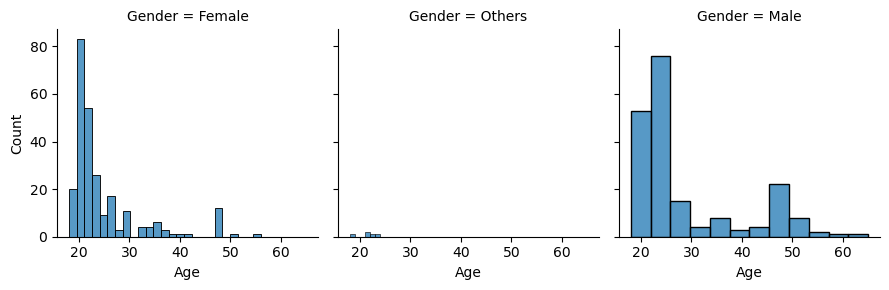

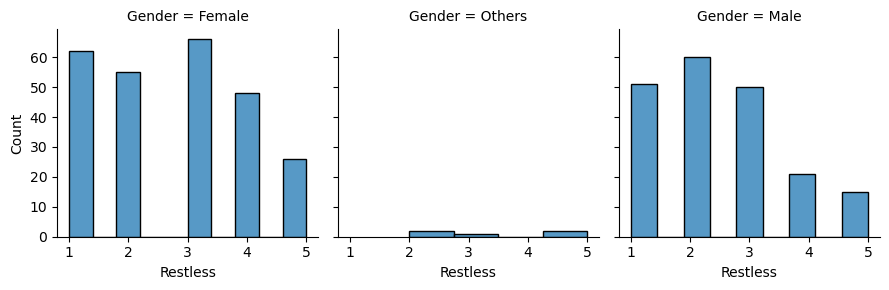

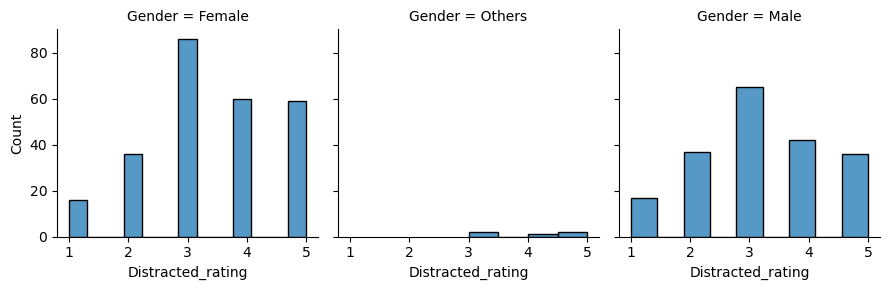

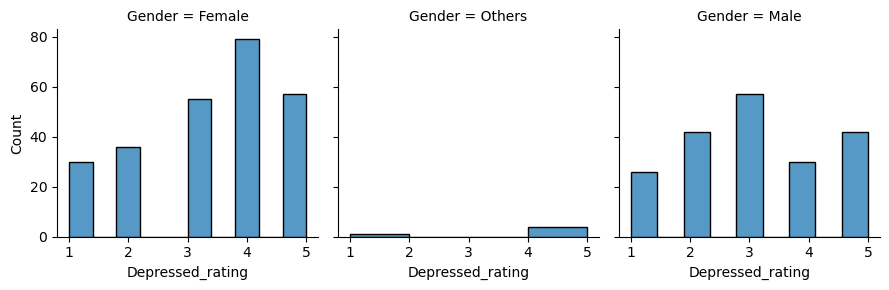

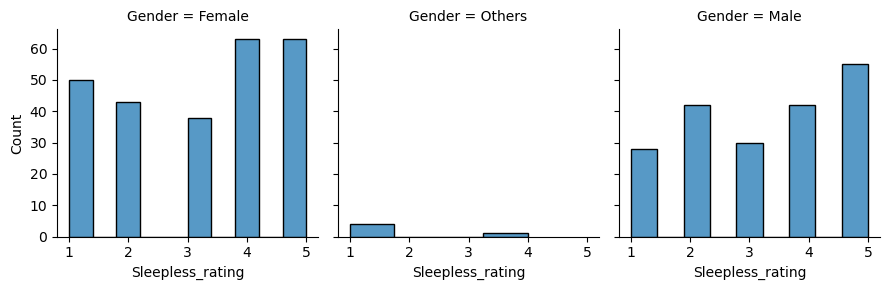

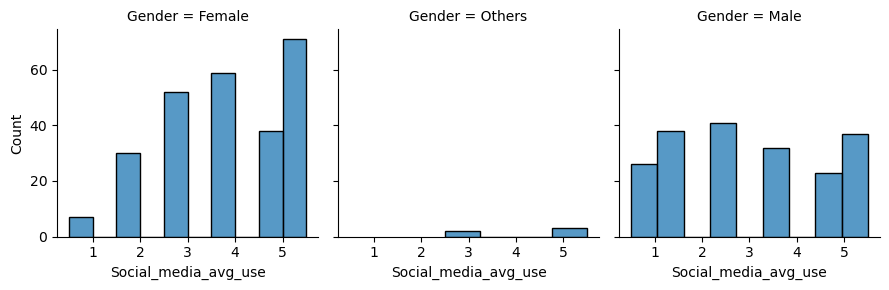

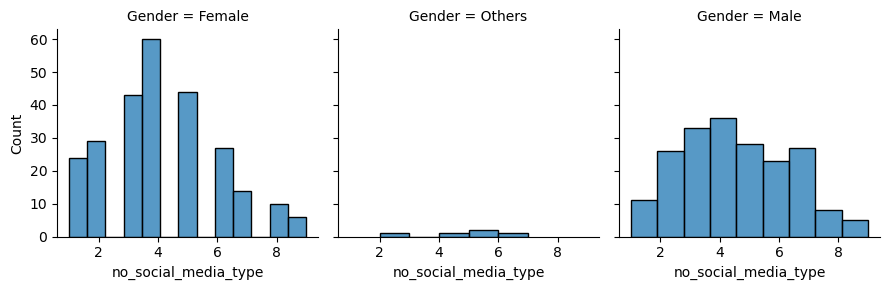

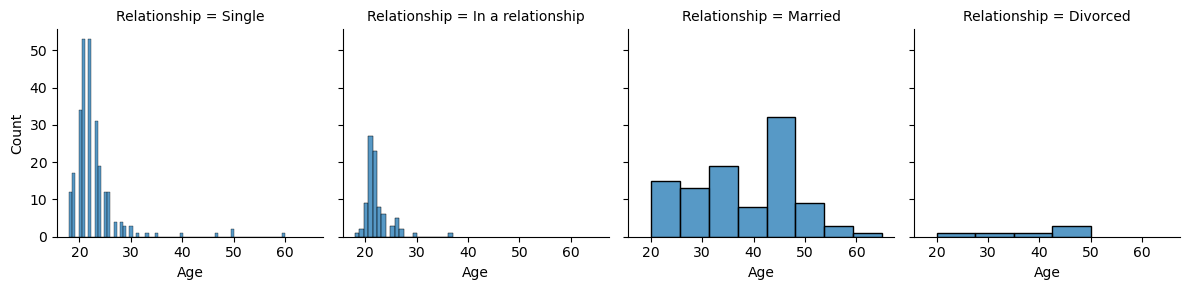

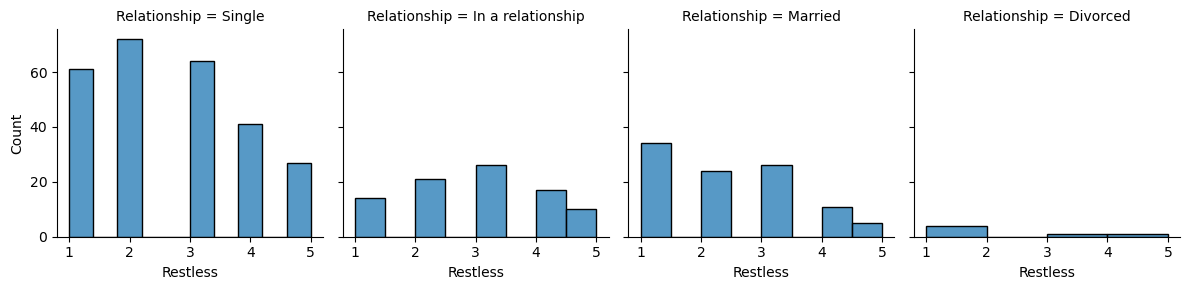

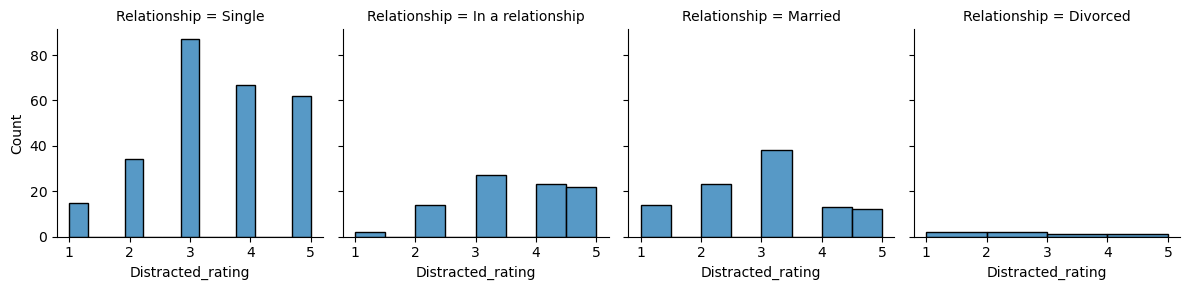

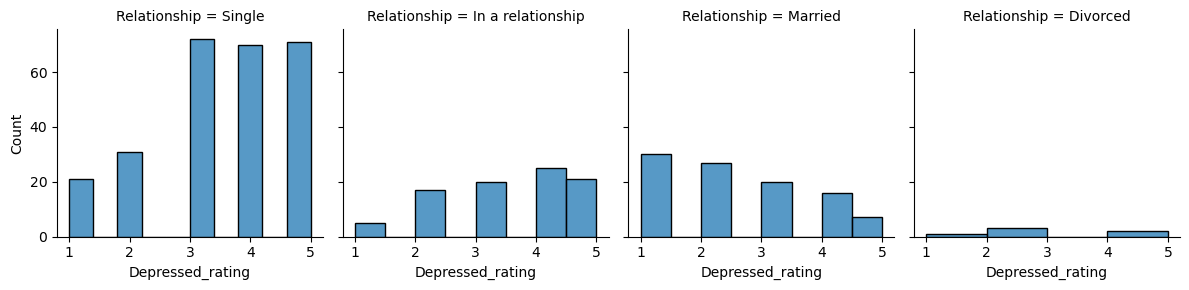

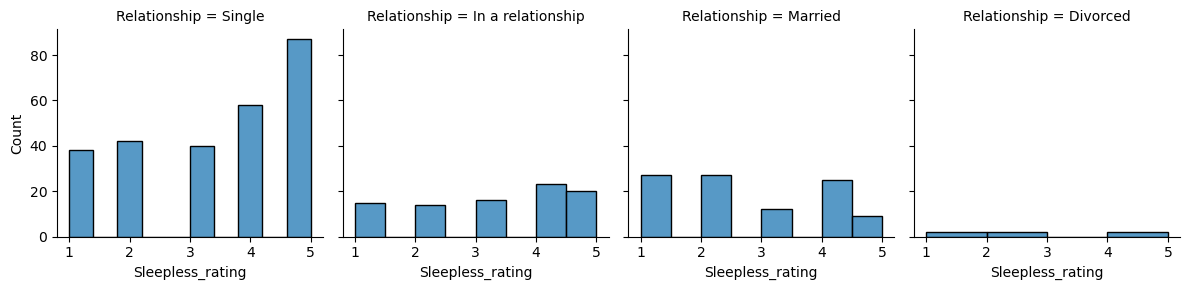

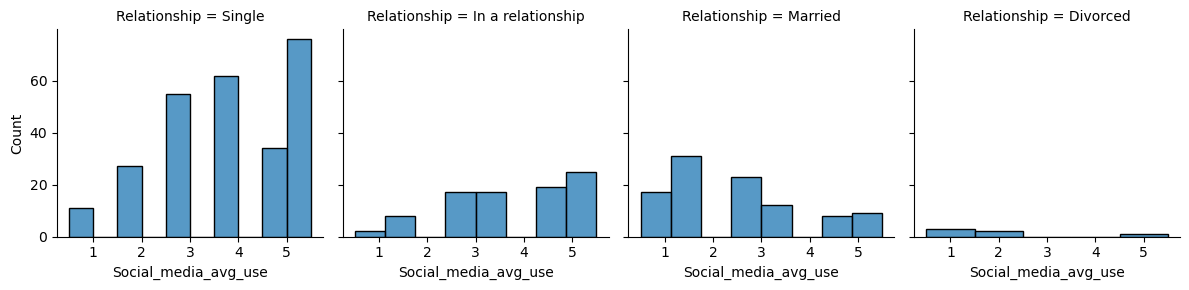

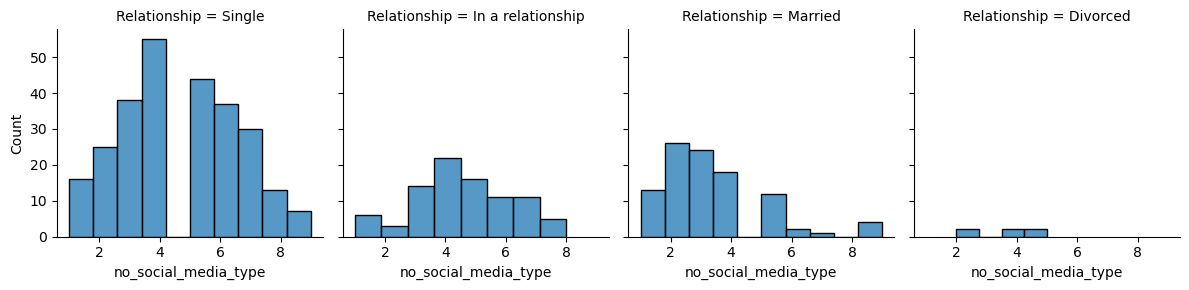

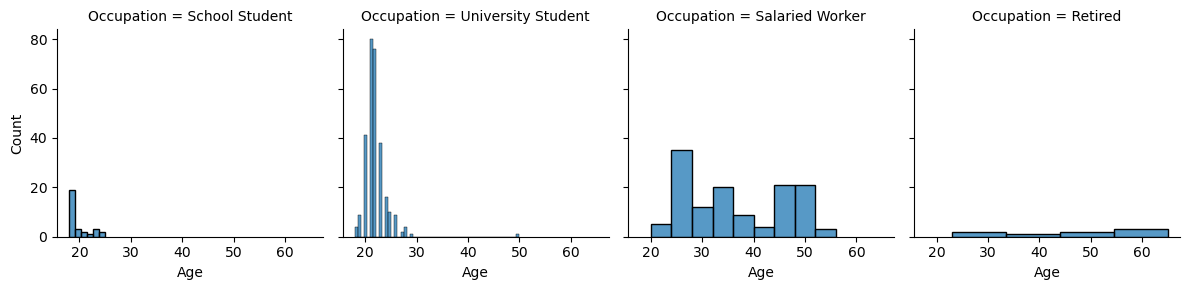

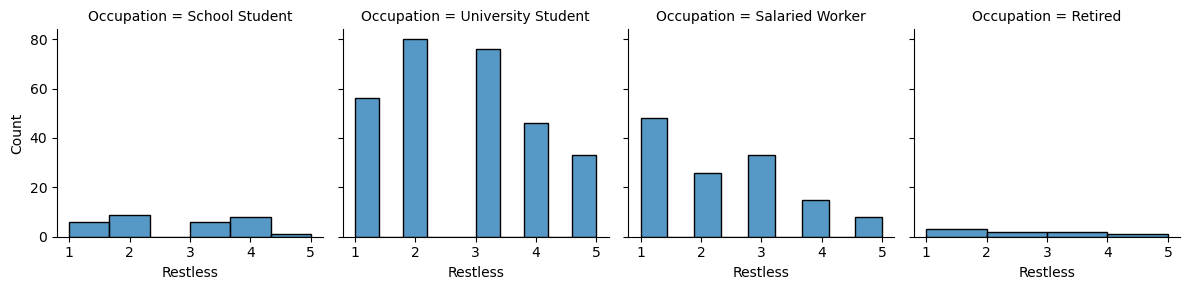

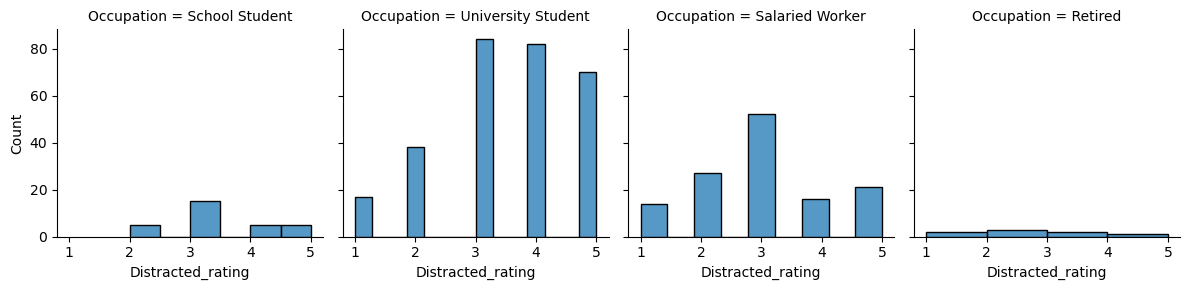

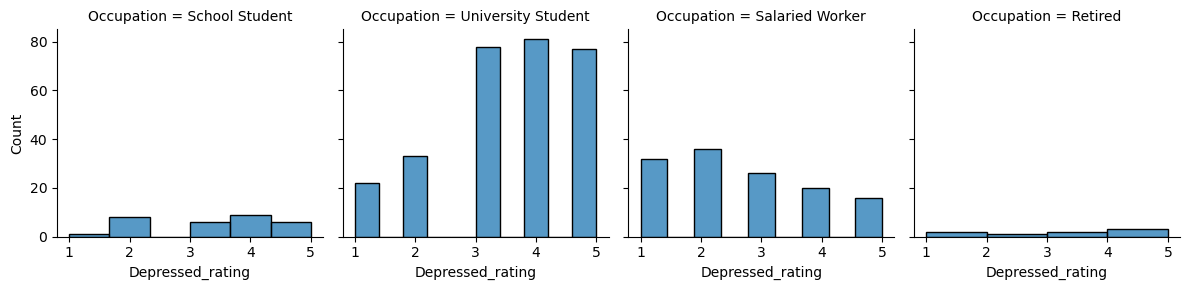

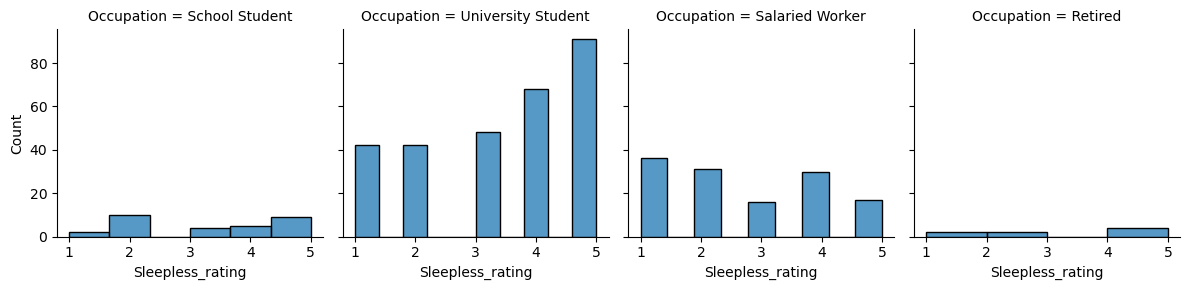

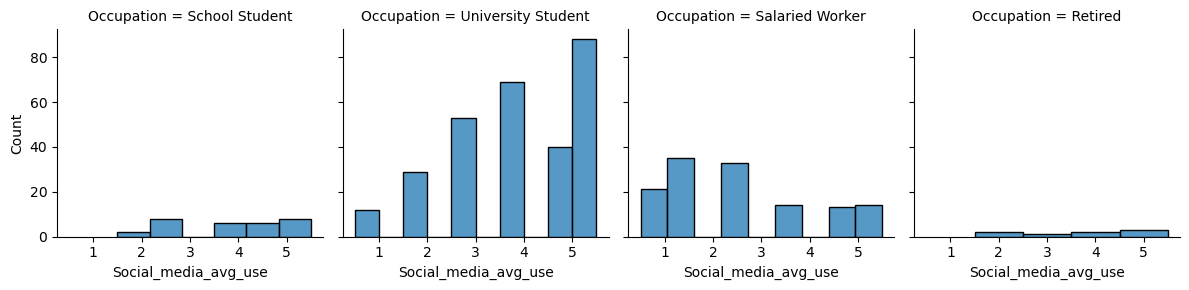

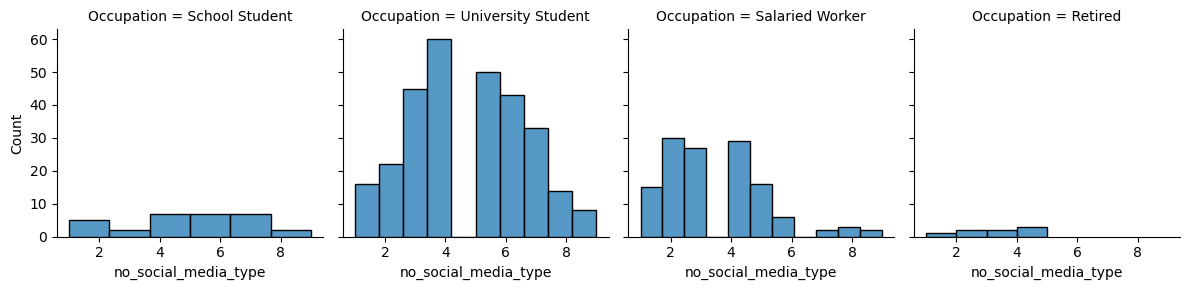

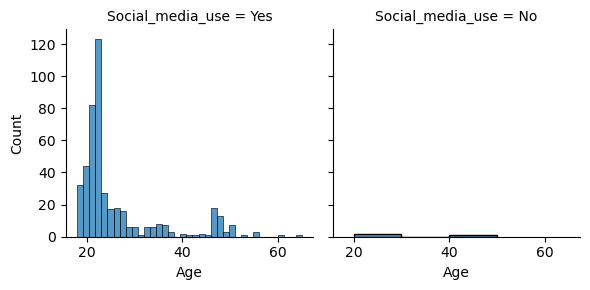

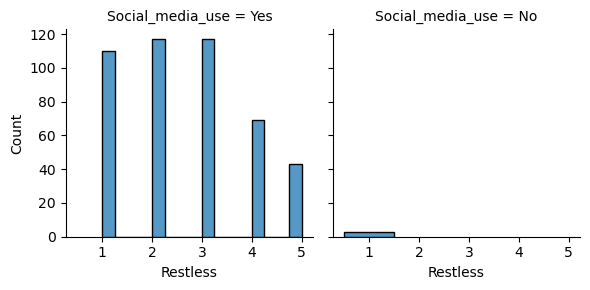

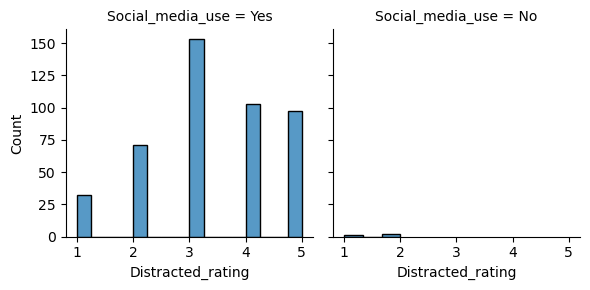

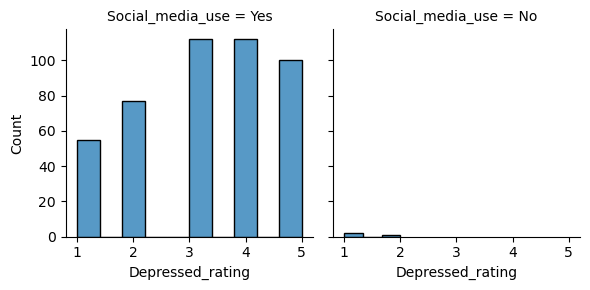

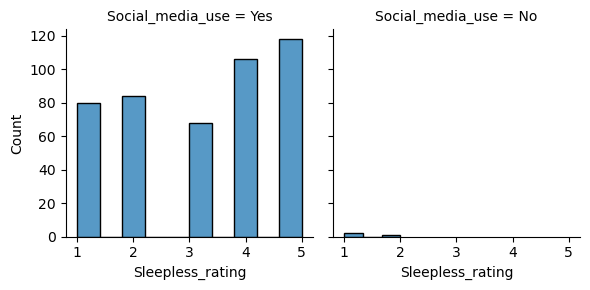

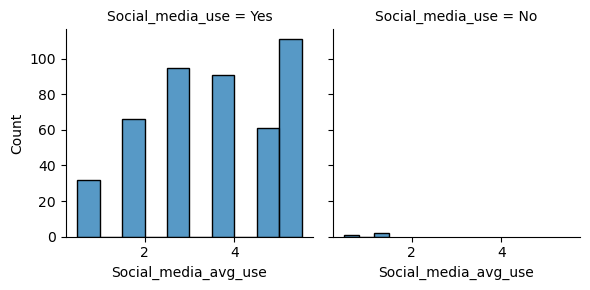

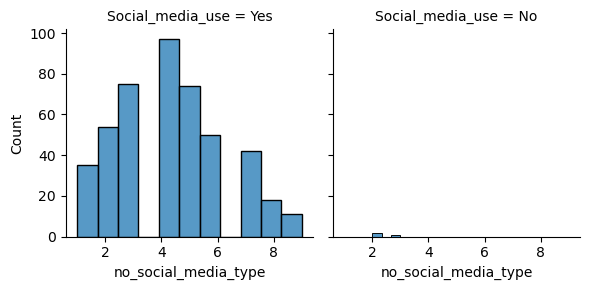

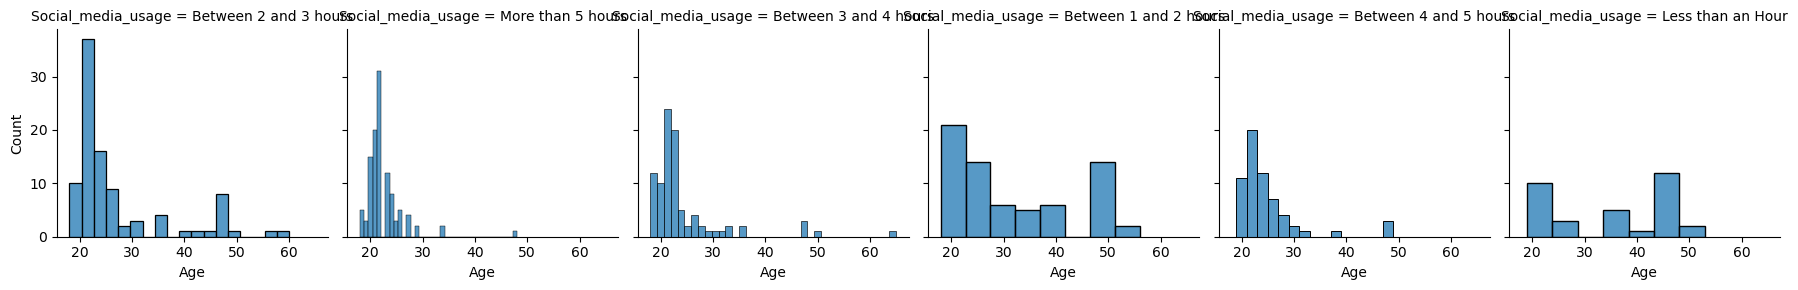

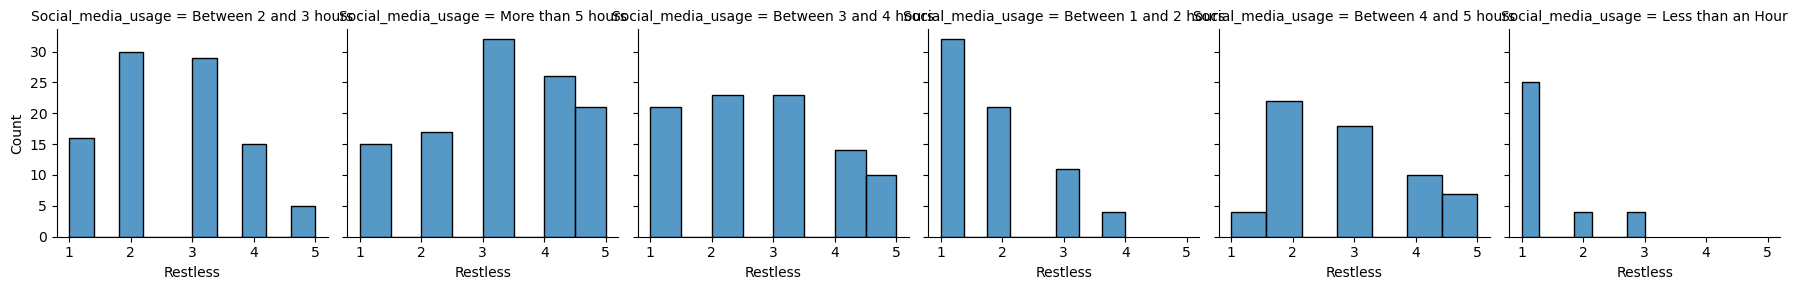

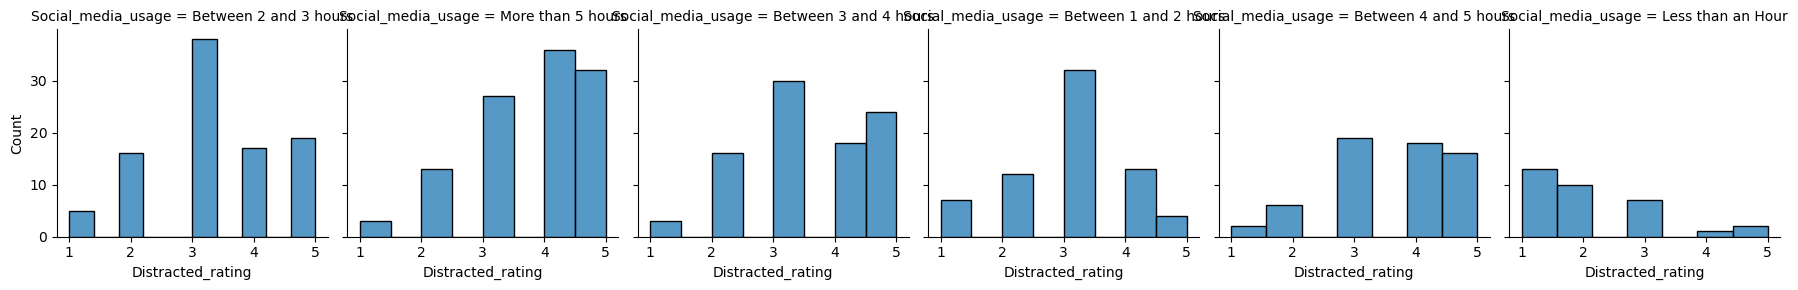

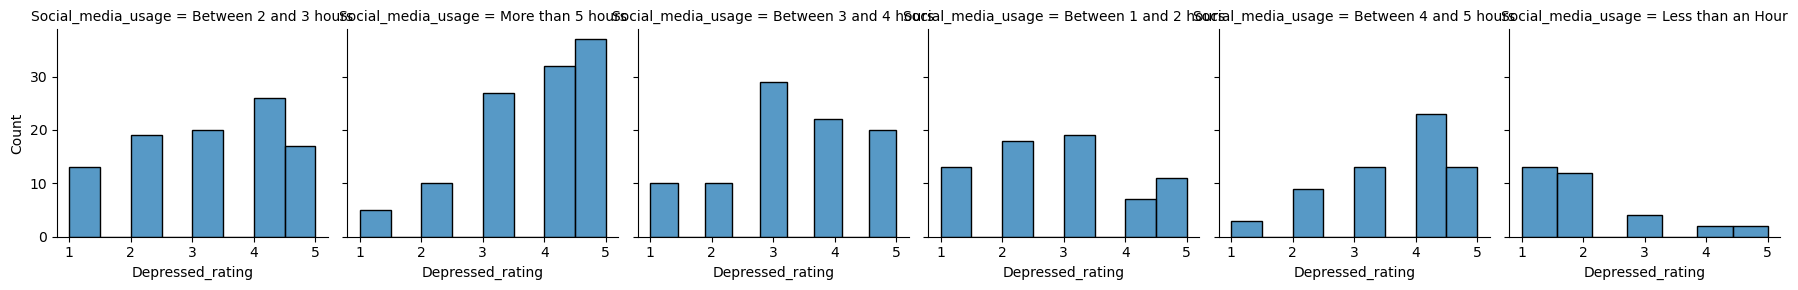

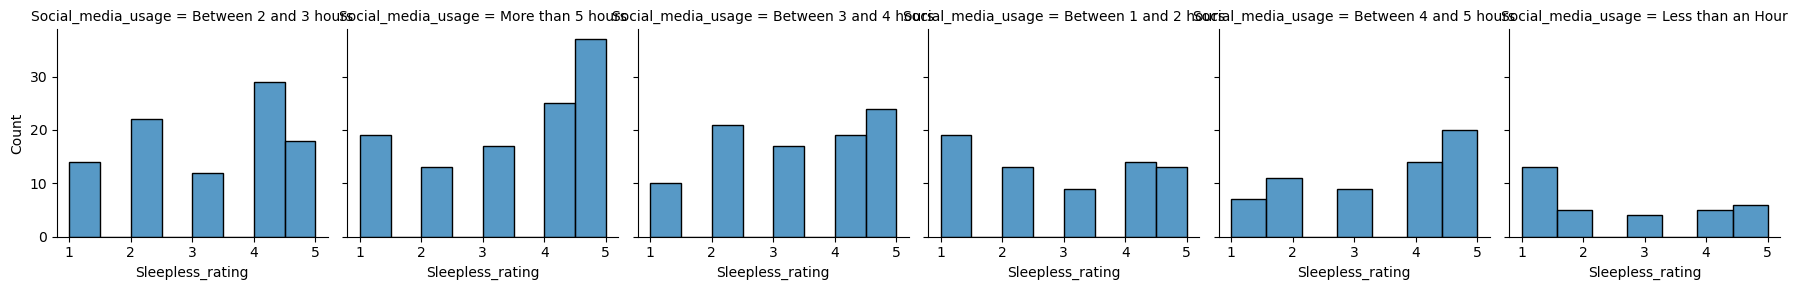

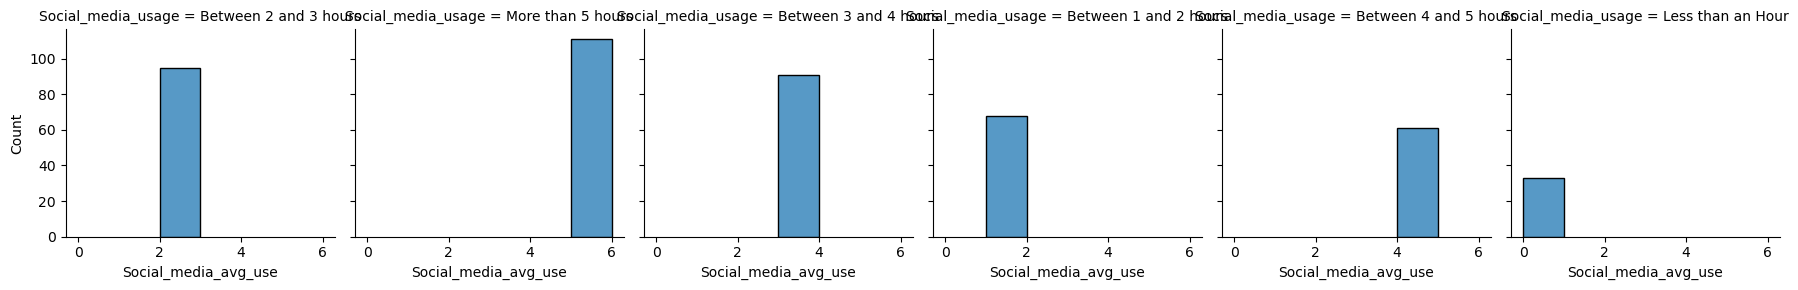

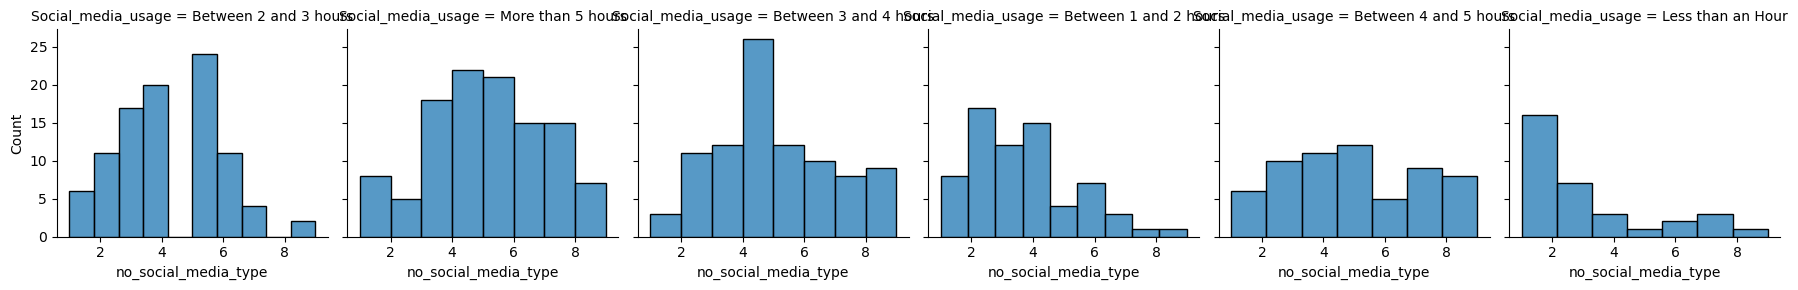

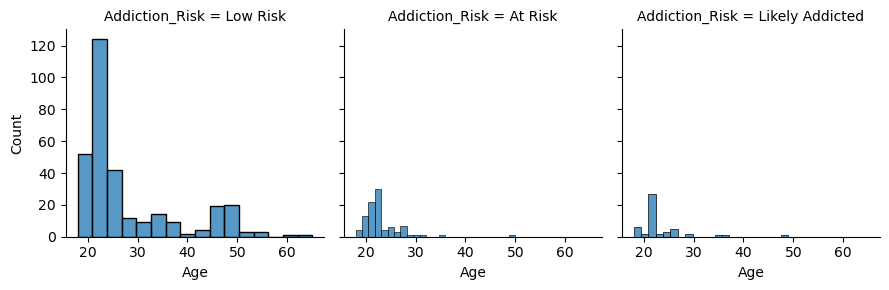

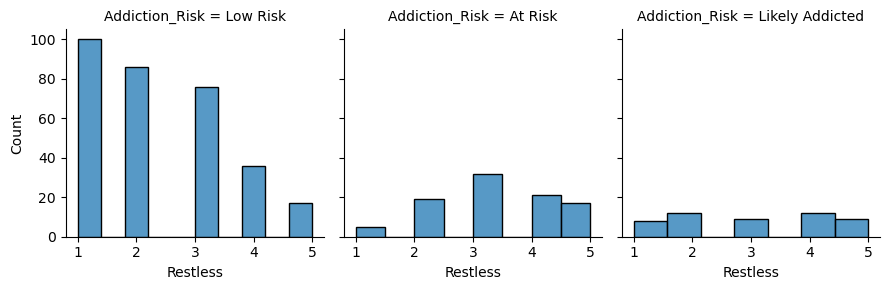

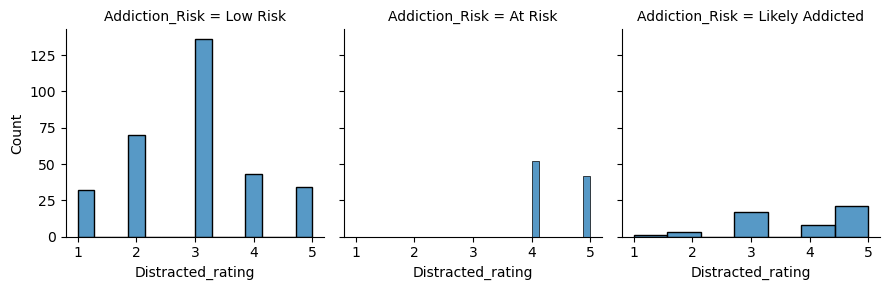

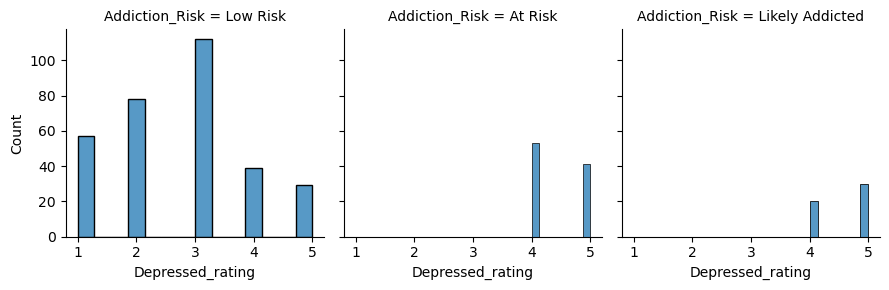

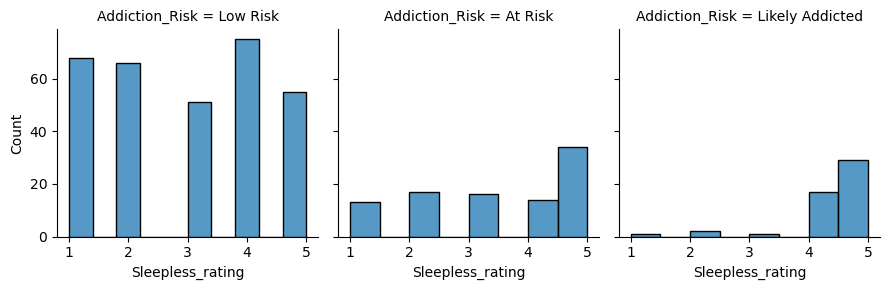

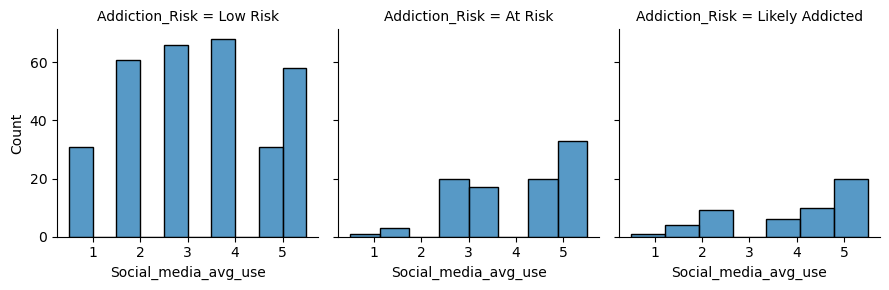

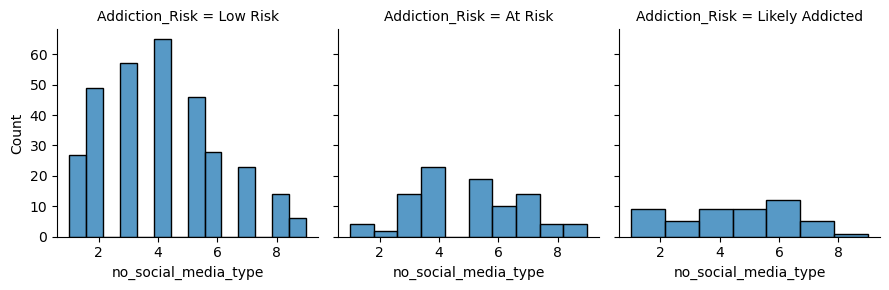

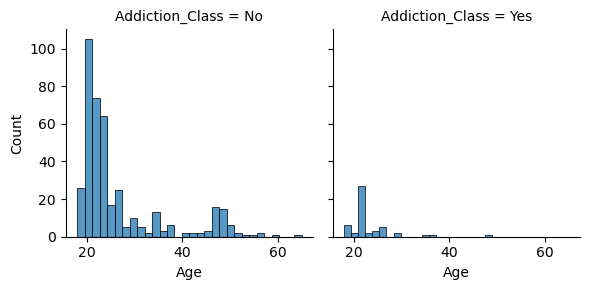

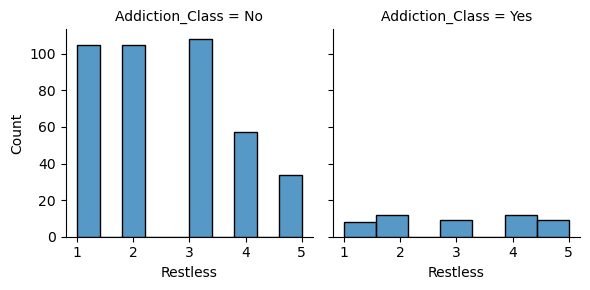

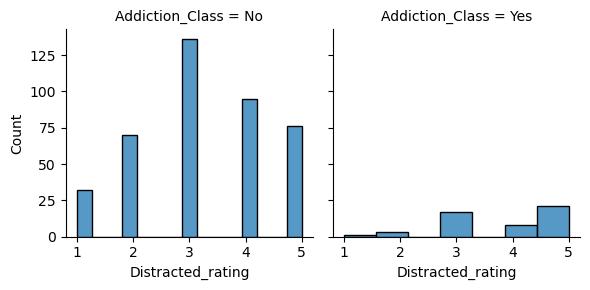

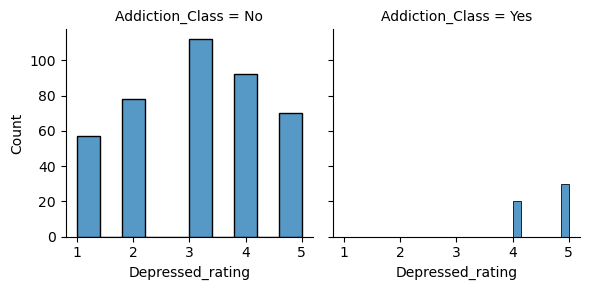

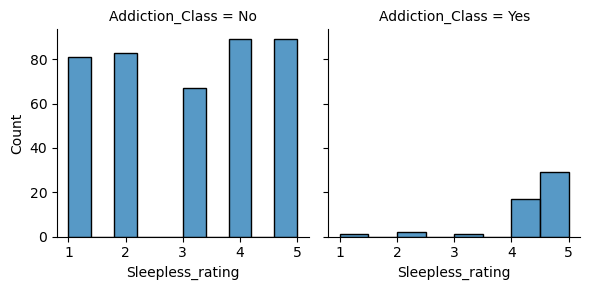

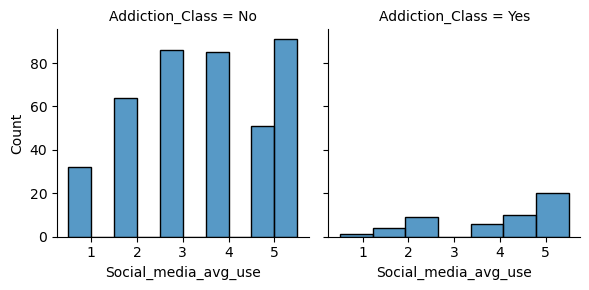

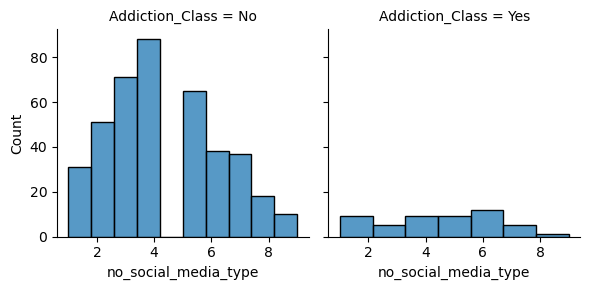

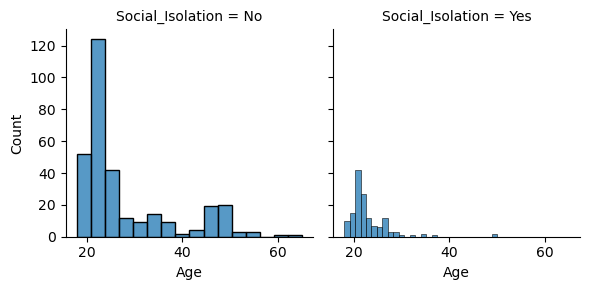

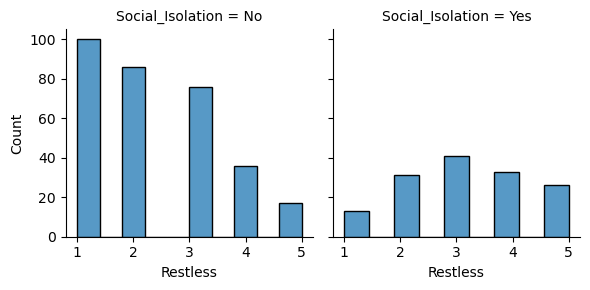

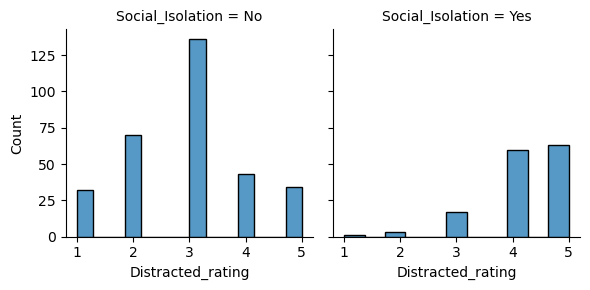

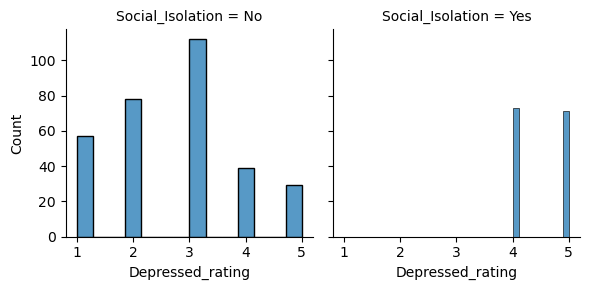

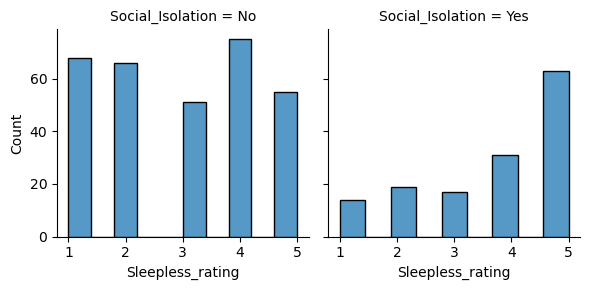

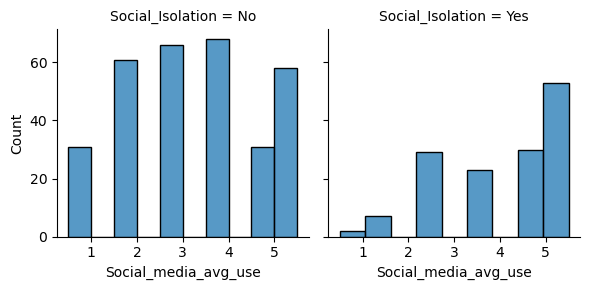

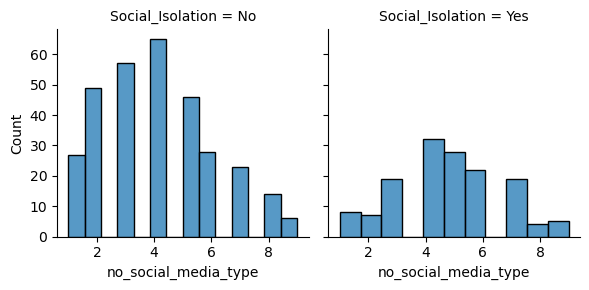

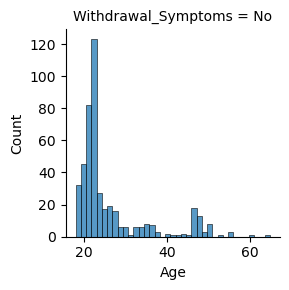

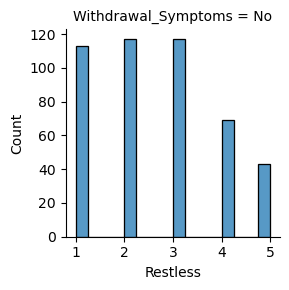

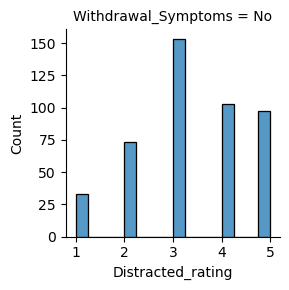

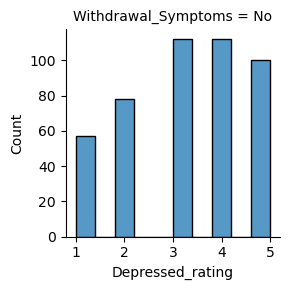

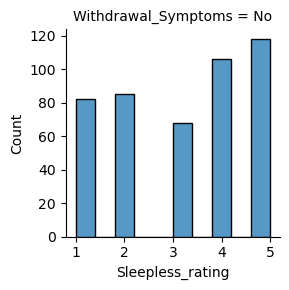

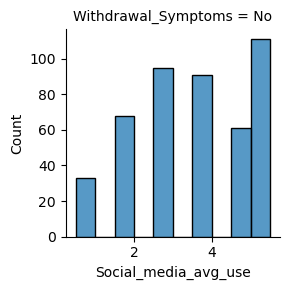

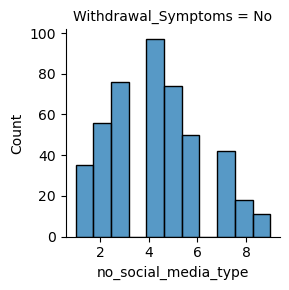

In [66]:
# Facet grid for Multivariate Analysis
for cat in categorial_columns:
    for num in numerical_columns: 
        if cat=='Timestamp' or cat=='Social_media_type': continue
        g = sns.FacetGrid(merged_df, col=cat)
        g.map(sns.histplot, num)
        plt.show()

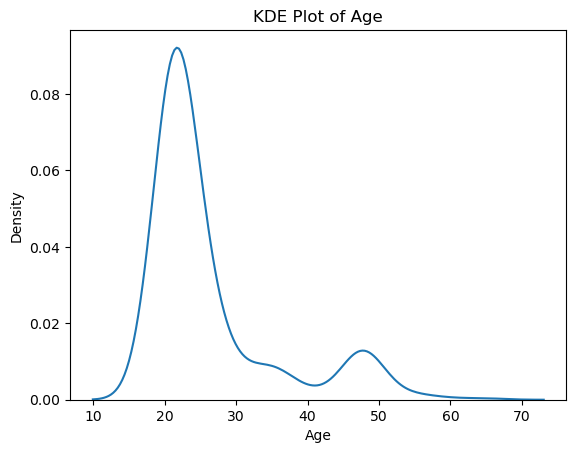

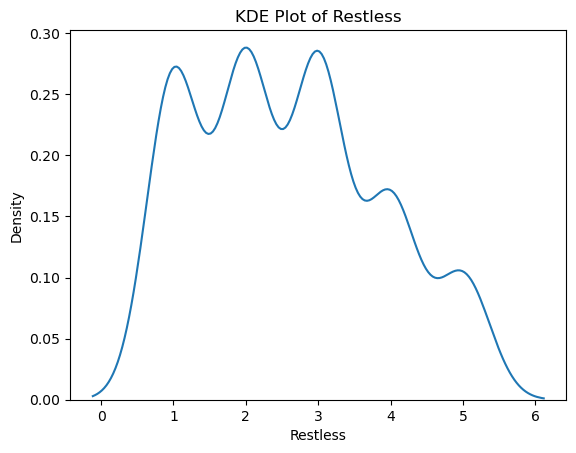

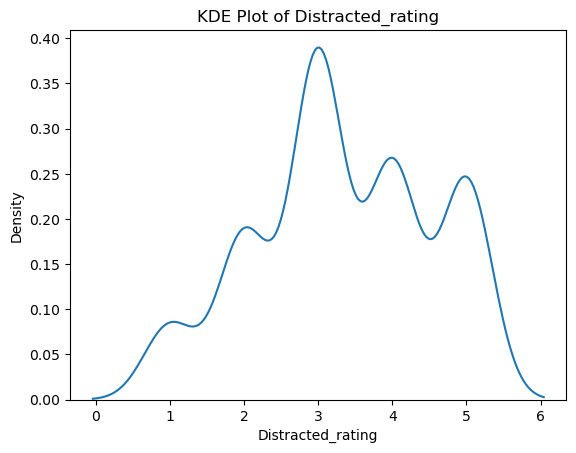

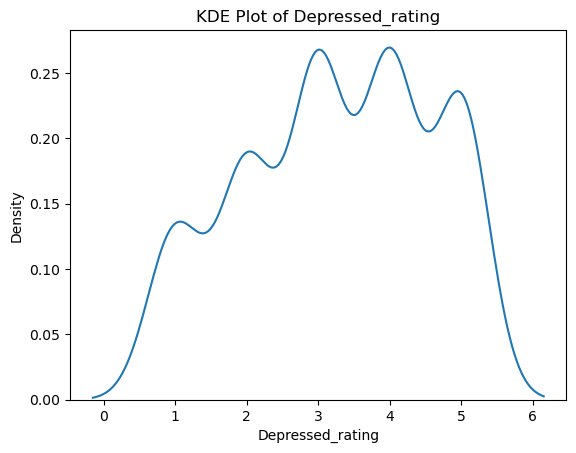

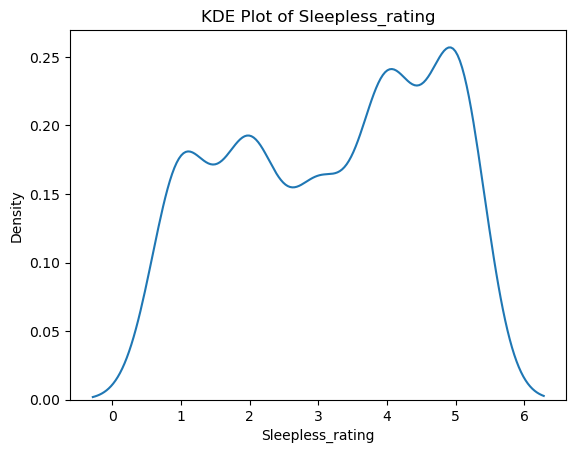

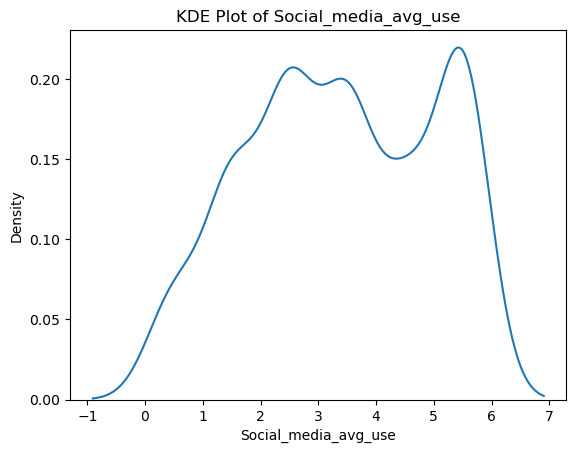

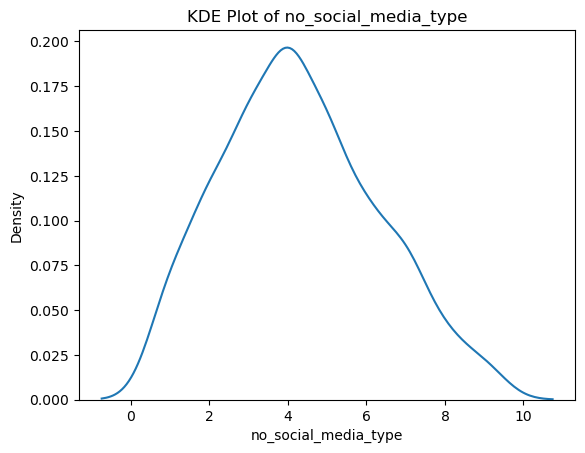

In [67]:
# Distribution Analysis with KDE Plot
for num in numerical_columns:
    sns.kdeplot(merged_df[num])
    title= 'KDE Plot of ' + num
    plt.title(title)
    plt.show()

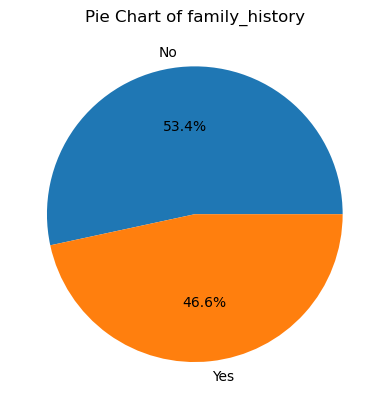

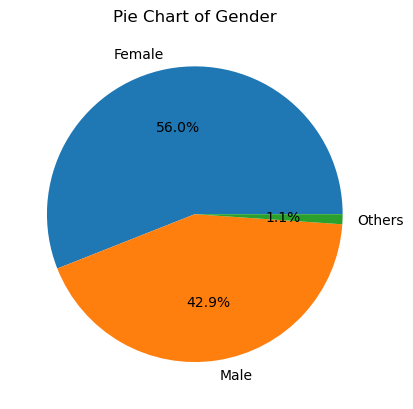

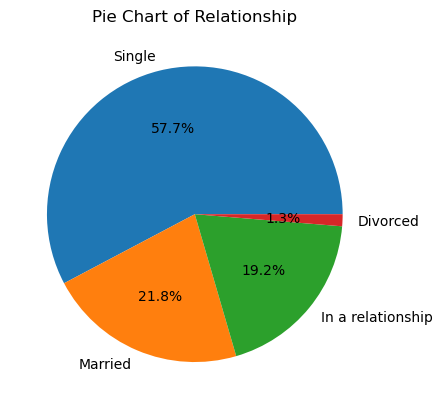

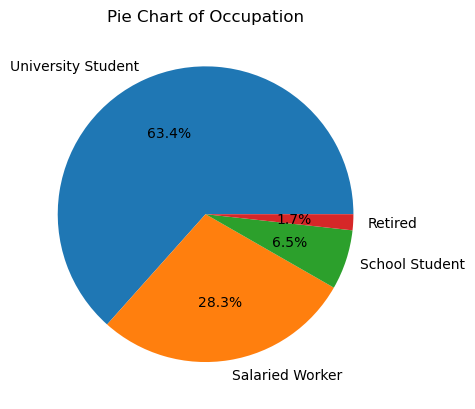

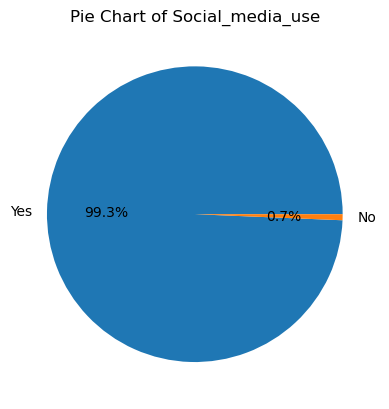

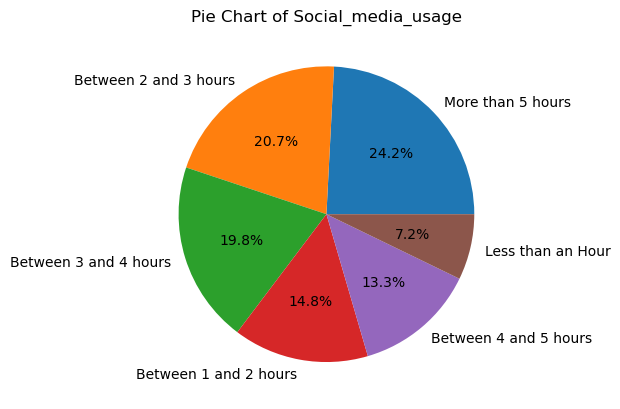

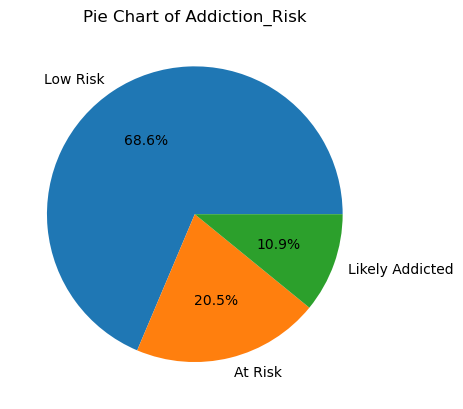

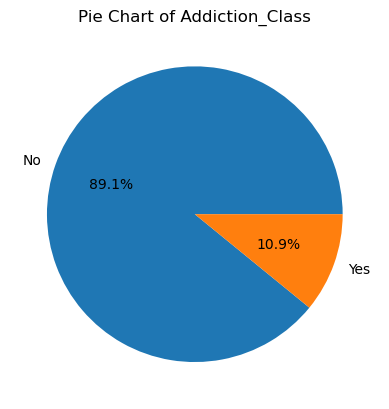

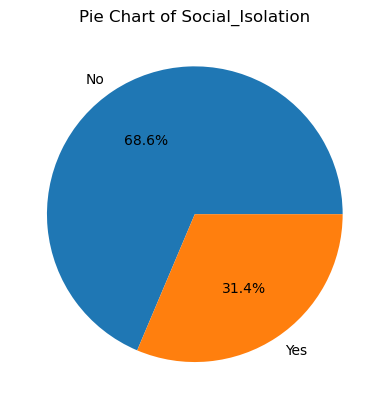

In [68]:
for category in categorial_columns:
    if category=='Timestamp' or category=='Social_media_type' or category=='Withdrawal_Symptoms': continue
    merged_df[category].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Pie Chart of ' +category)
    plt.ylabel('')
    plt.show()


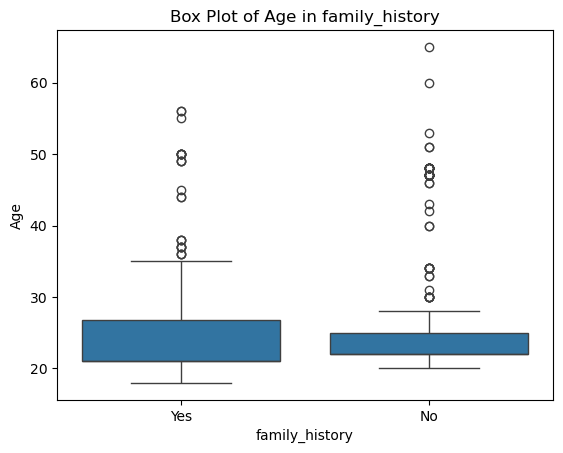

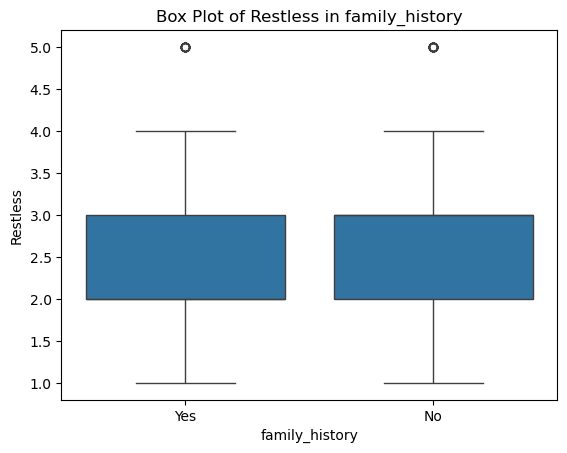

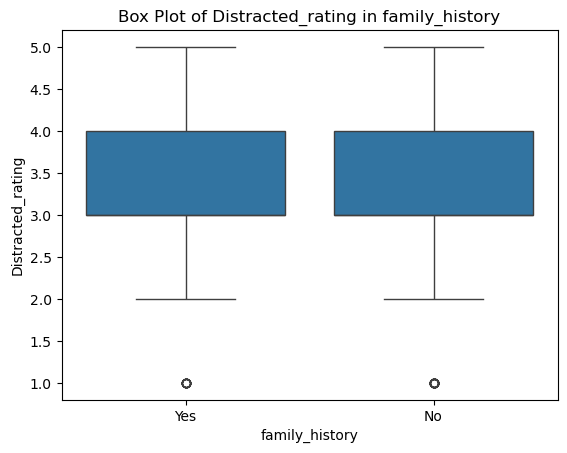

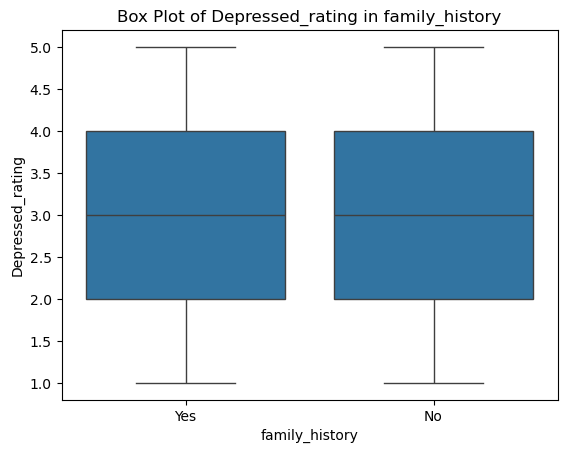

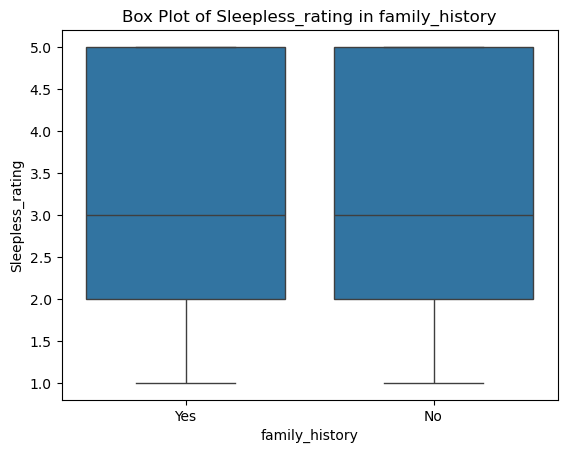

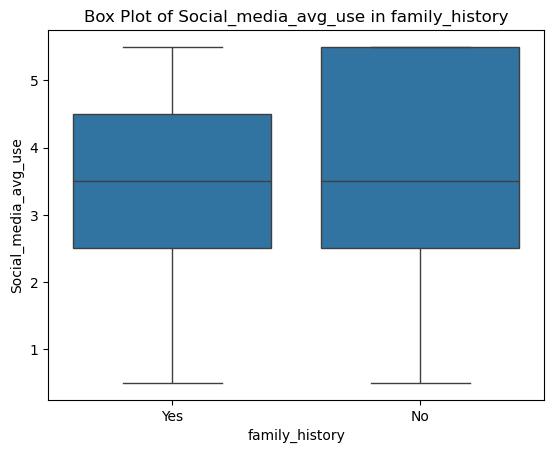

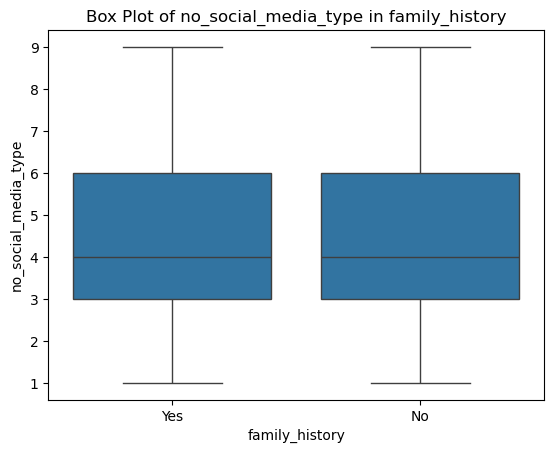

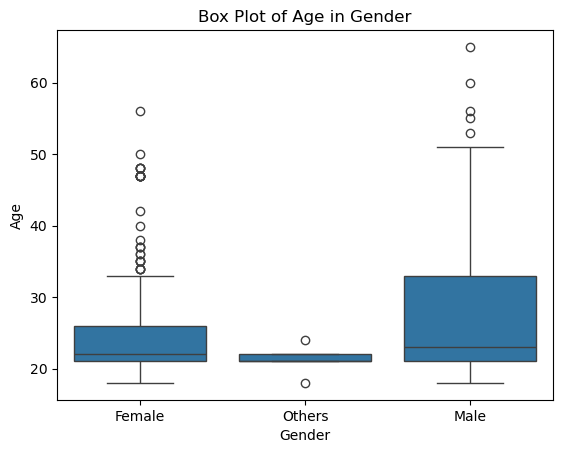

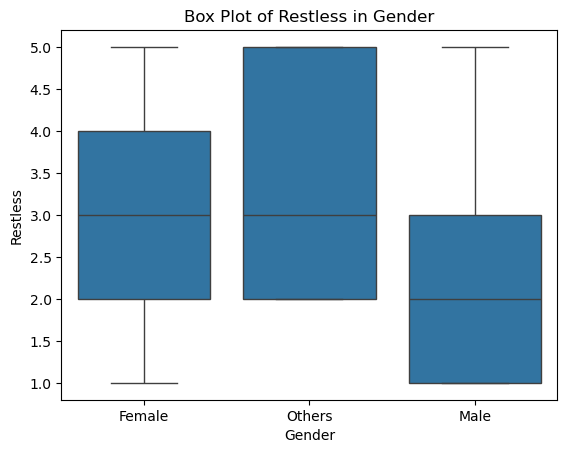

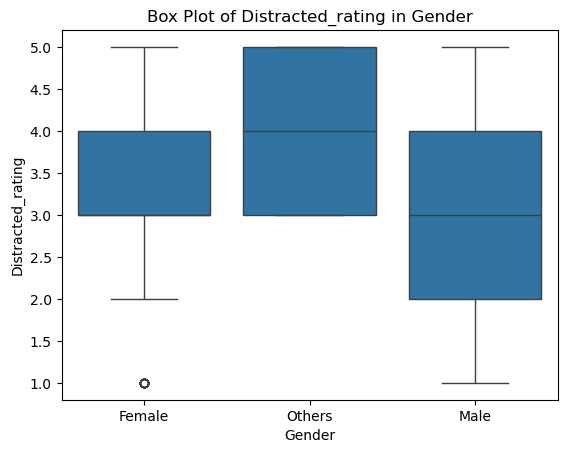

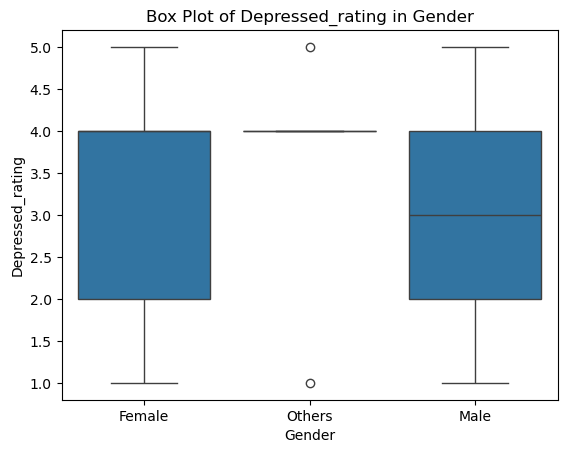

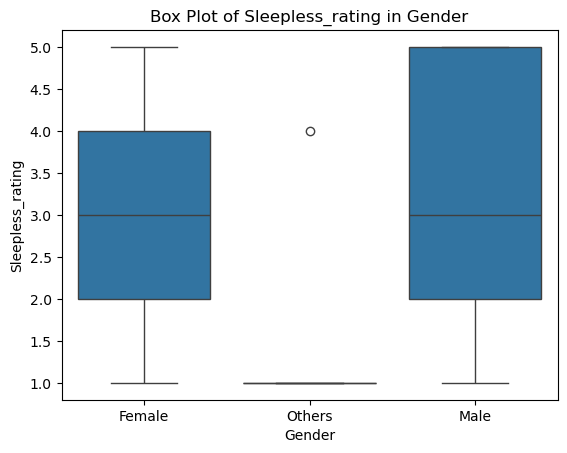

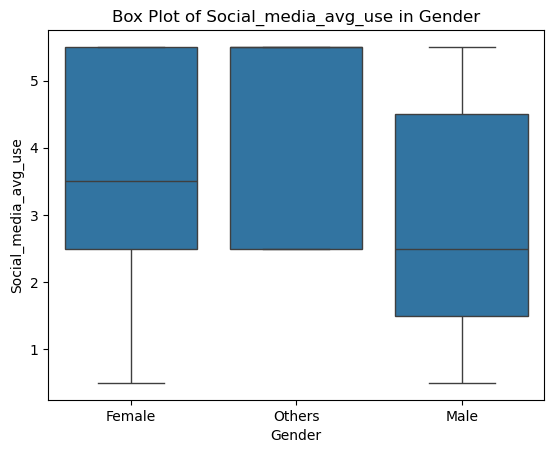

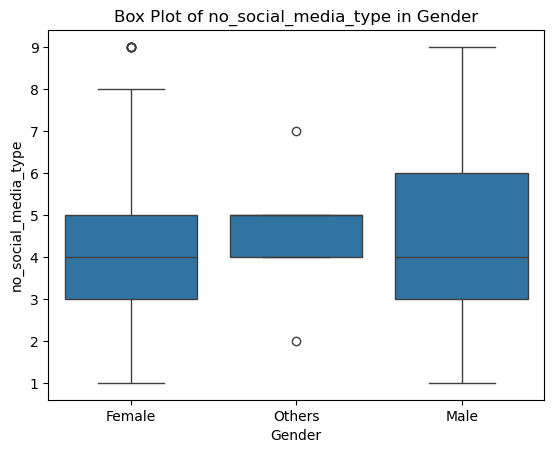

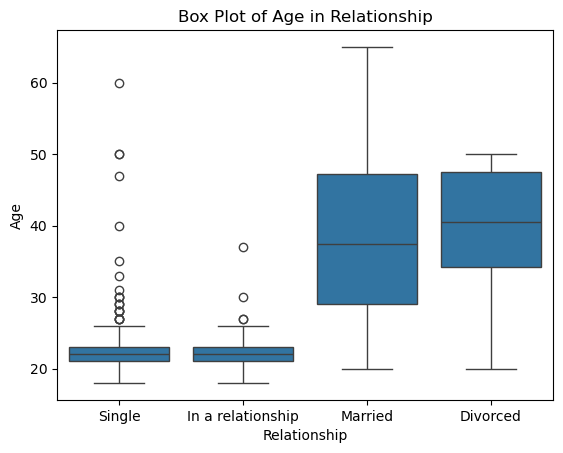

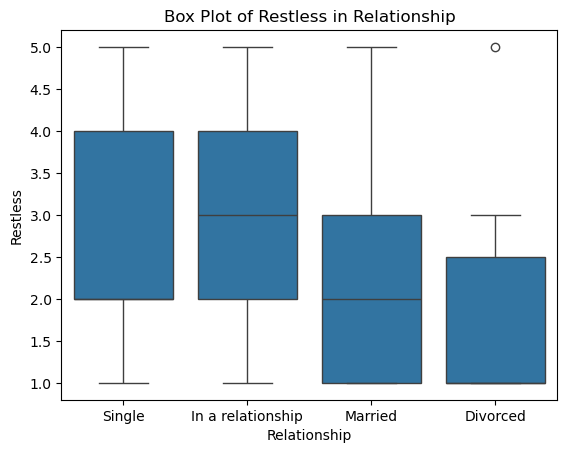

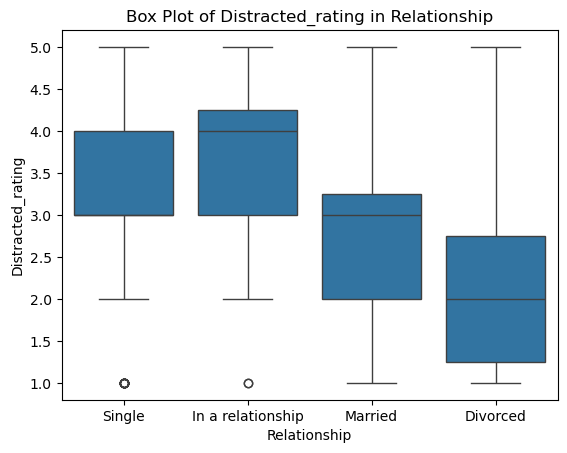

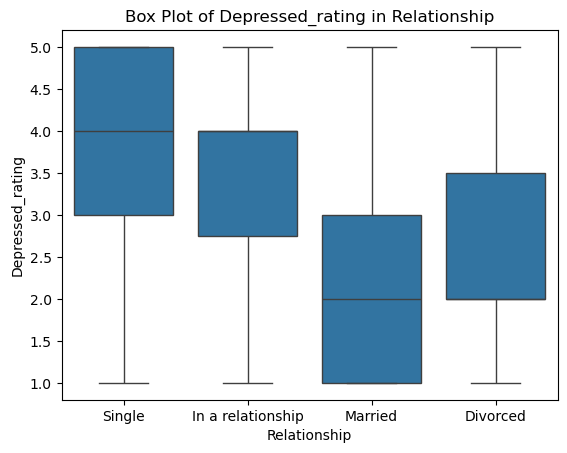

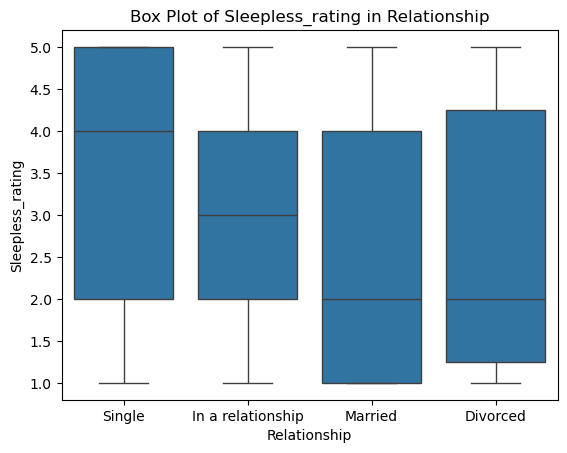

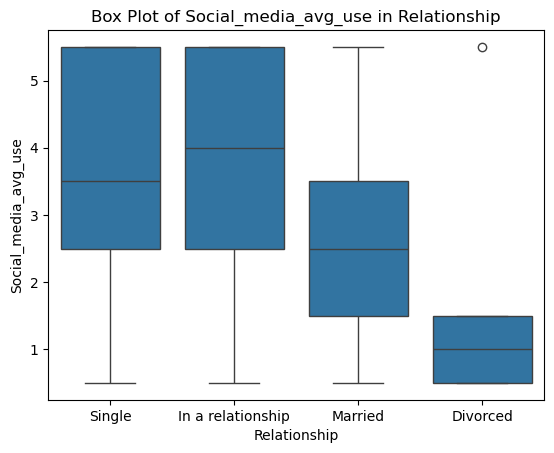

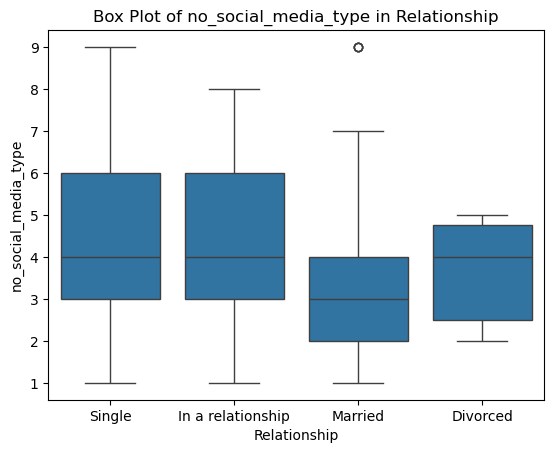

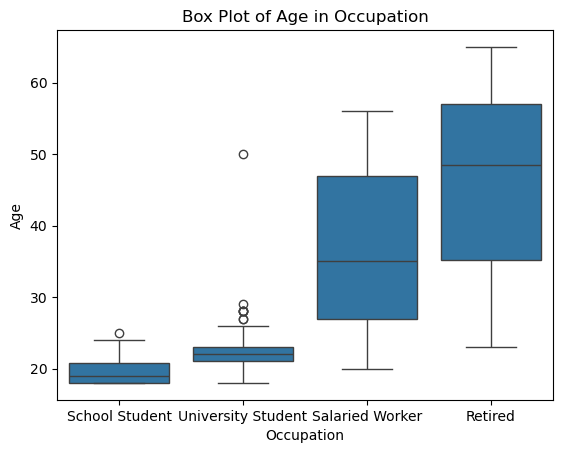

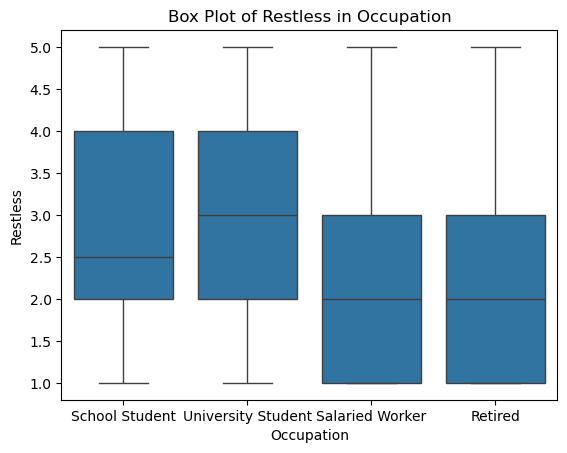

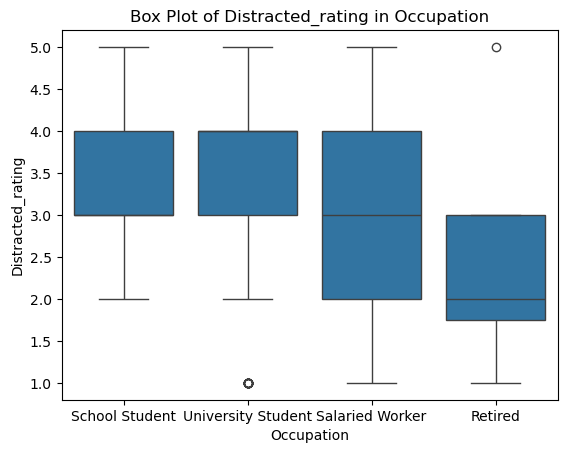

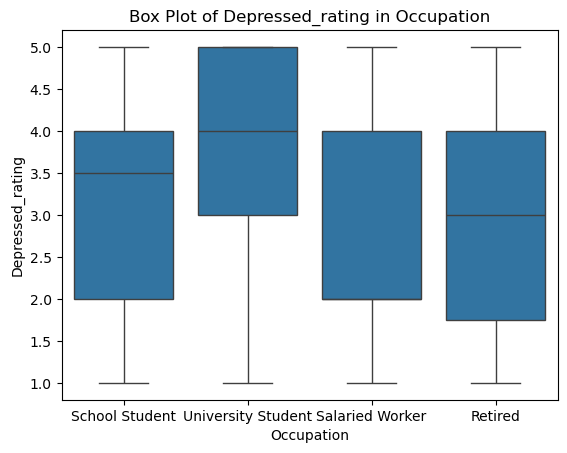

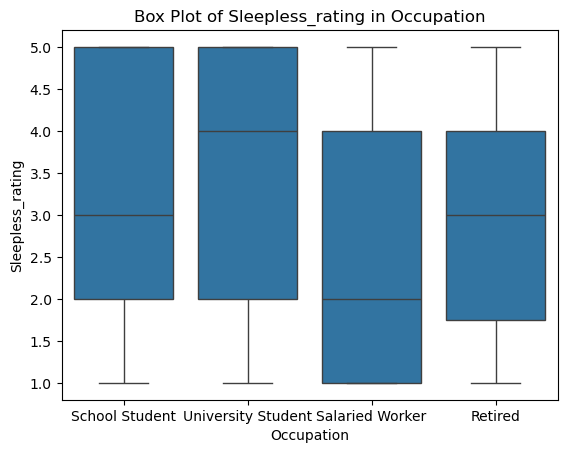

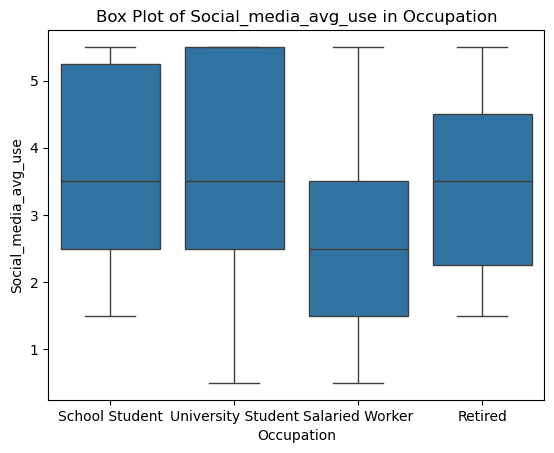

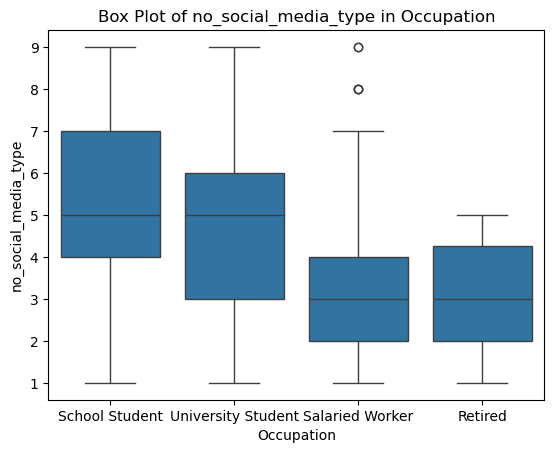

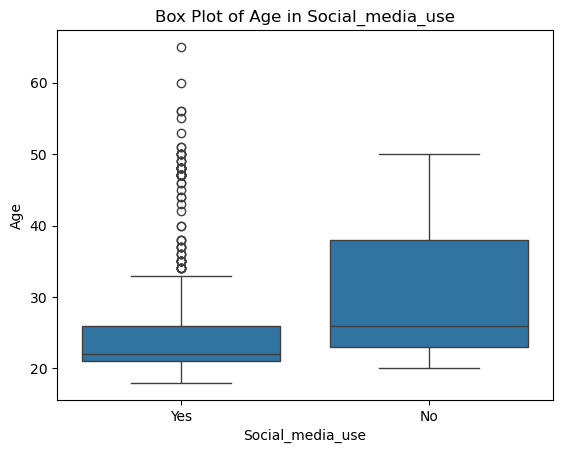

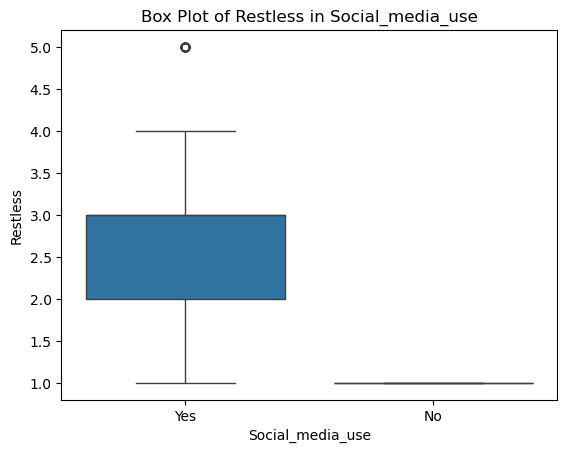

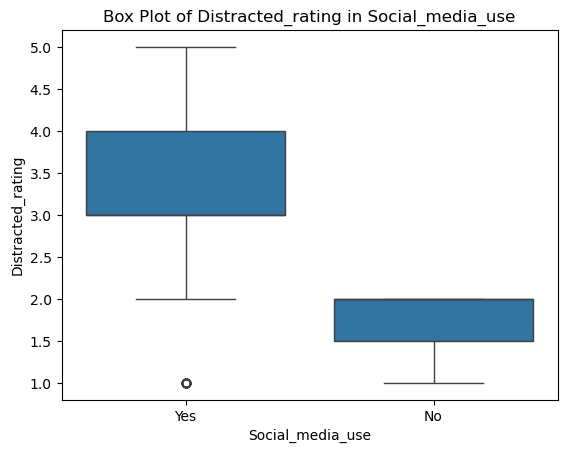

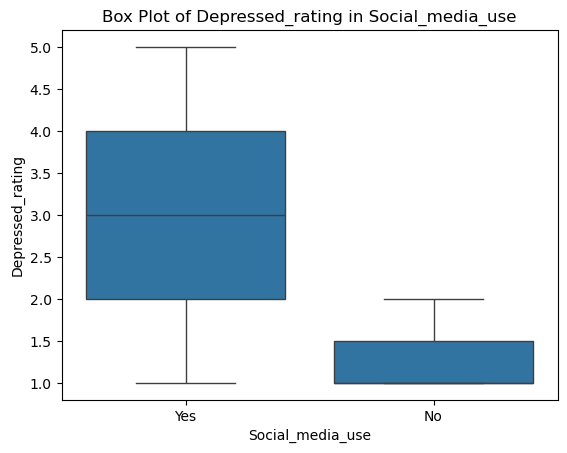

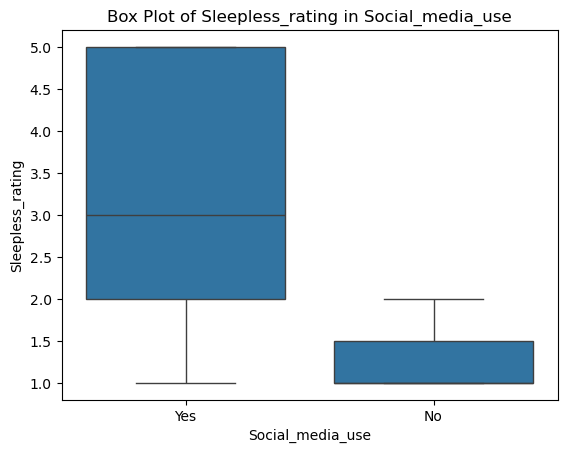

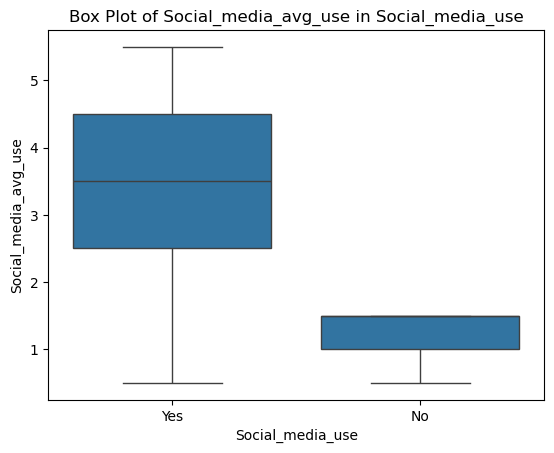

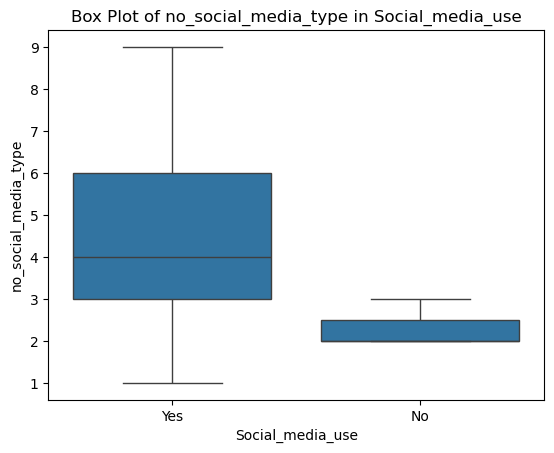

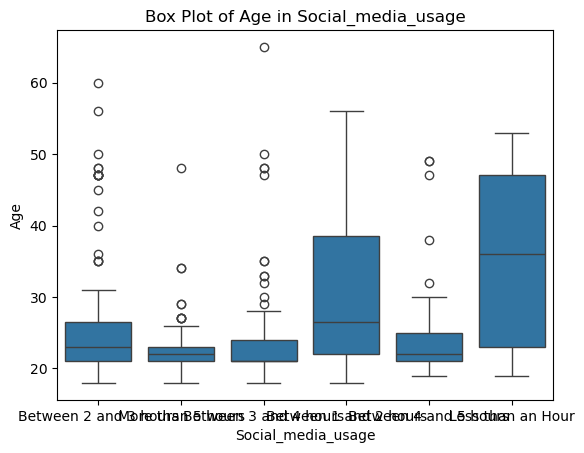

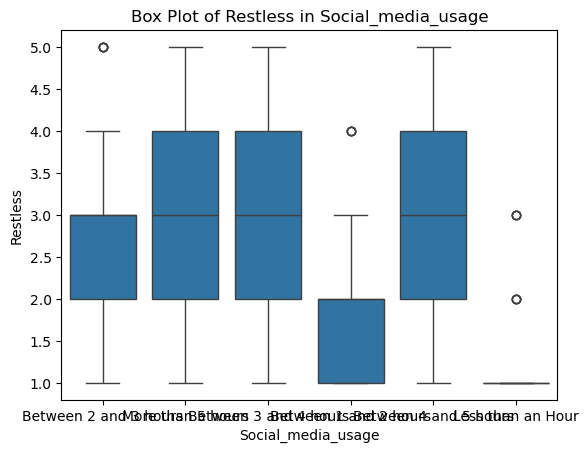

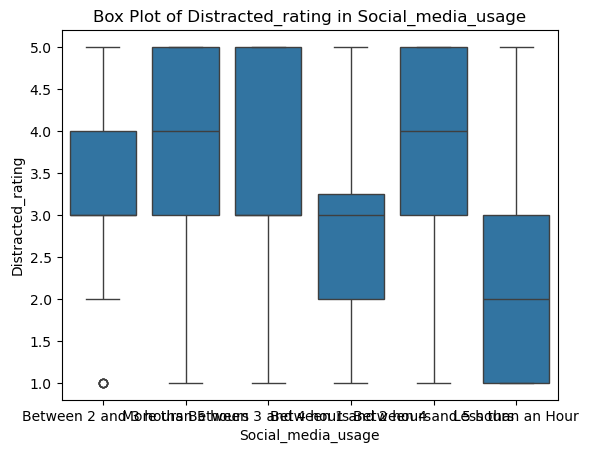

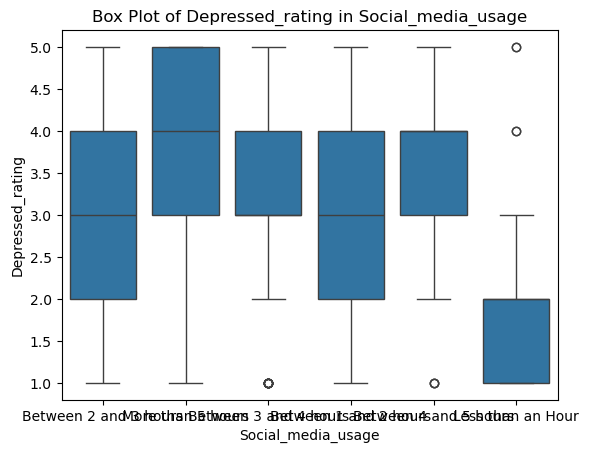

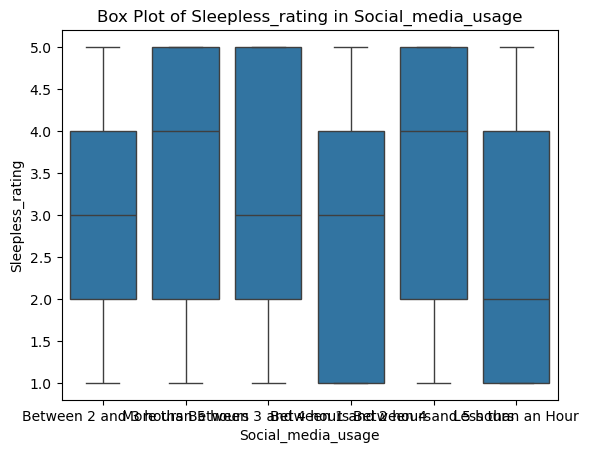

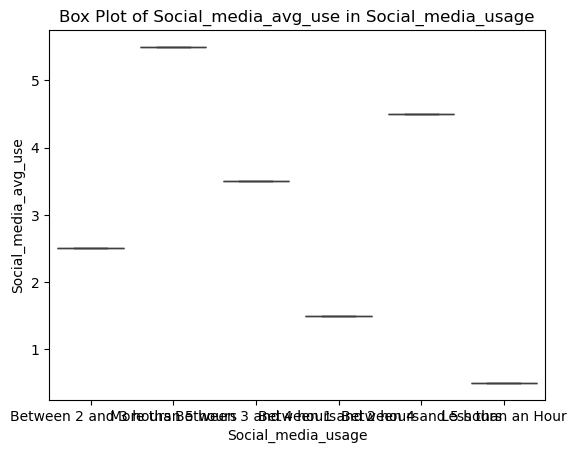

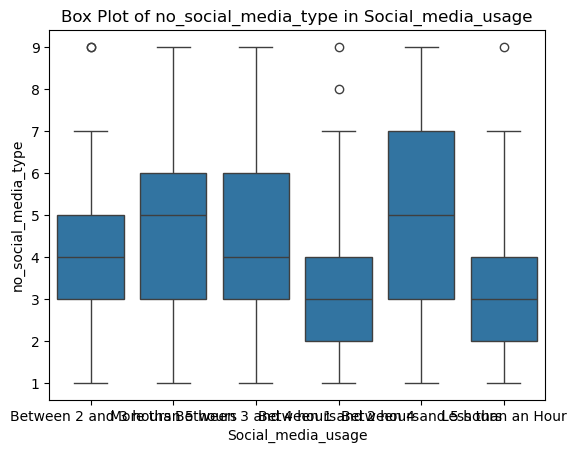

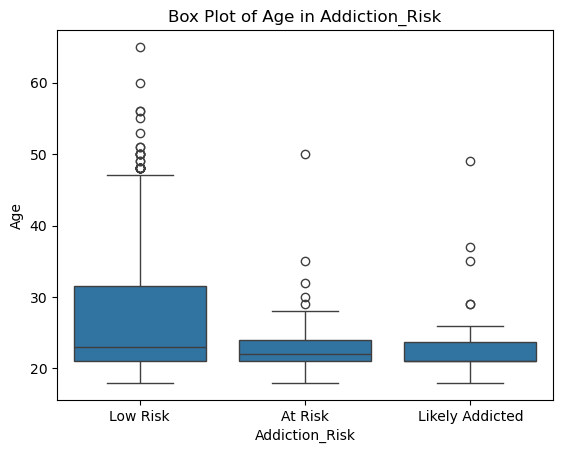

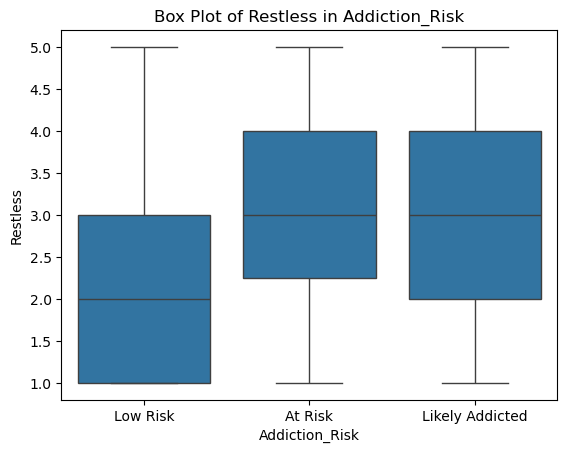

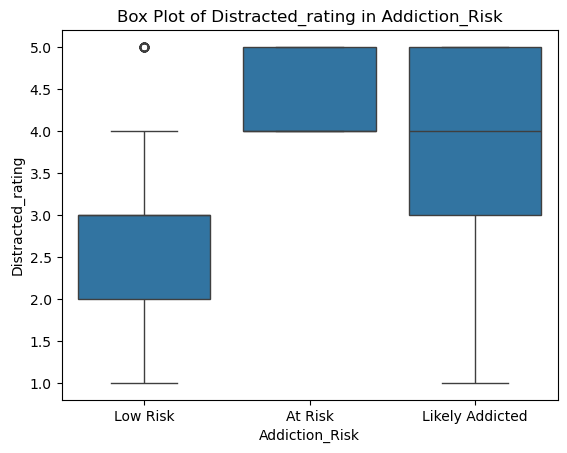

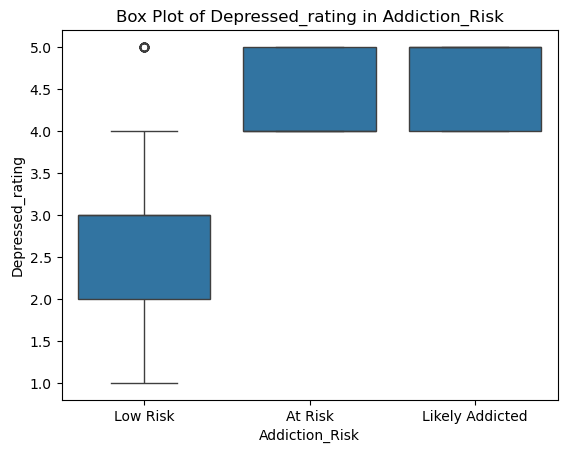

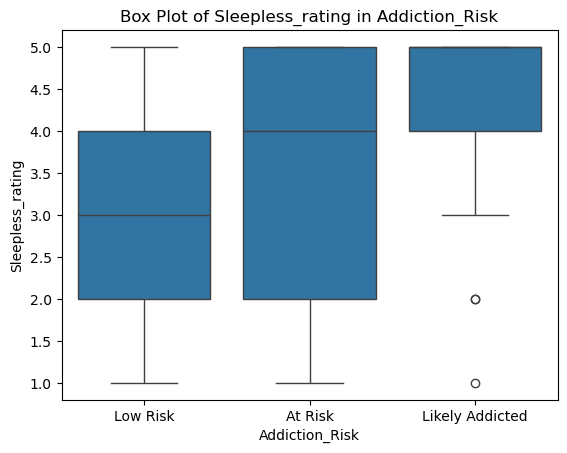

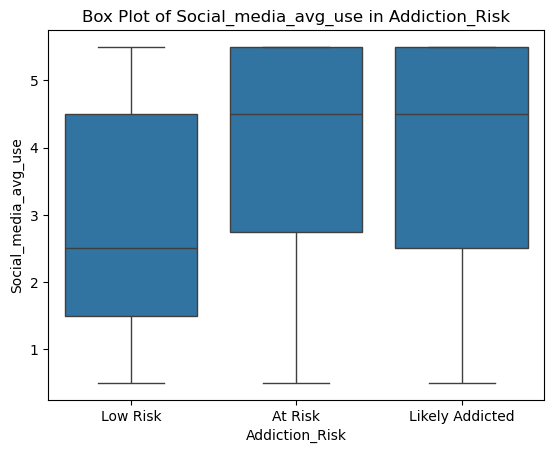

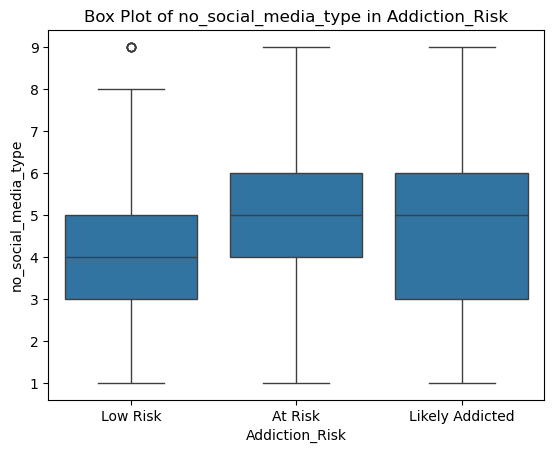

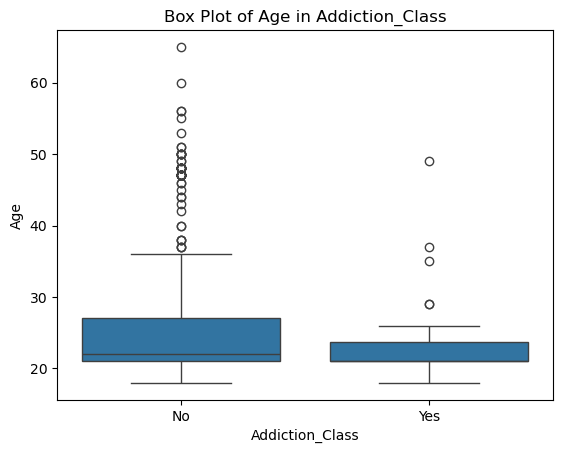

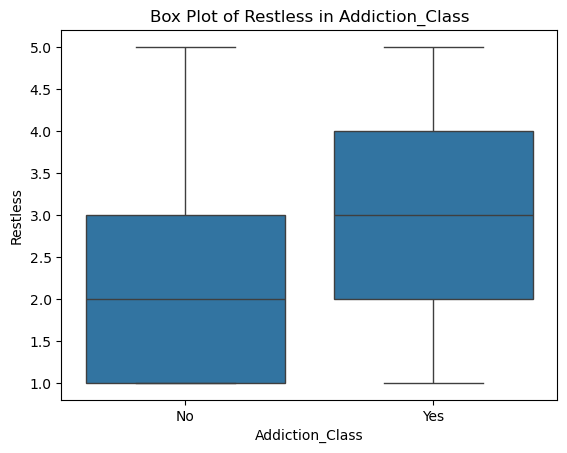

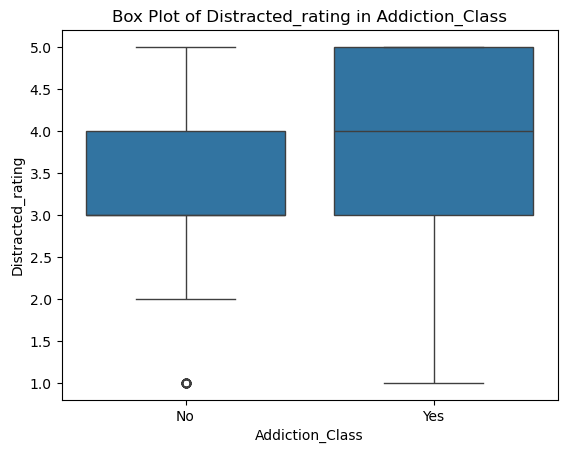

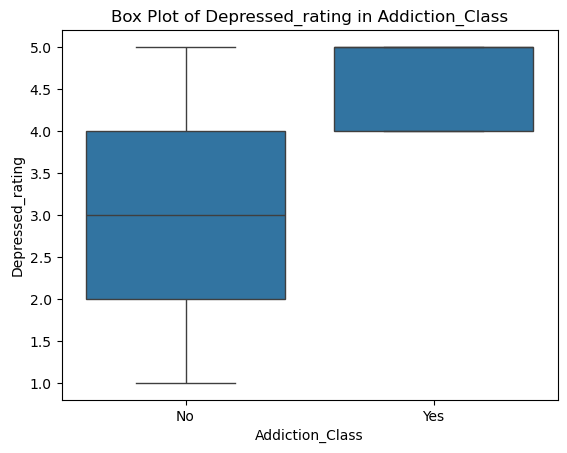

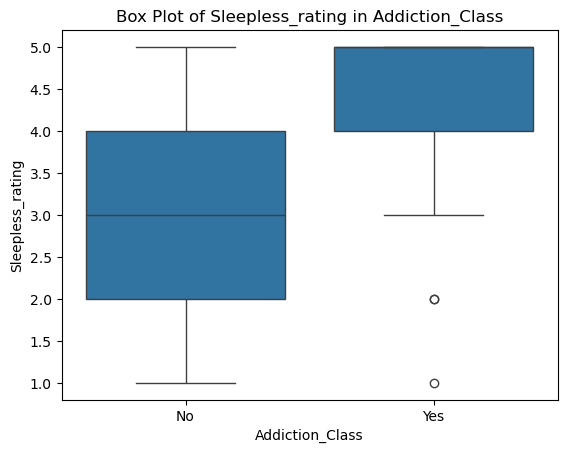

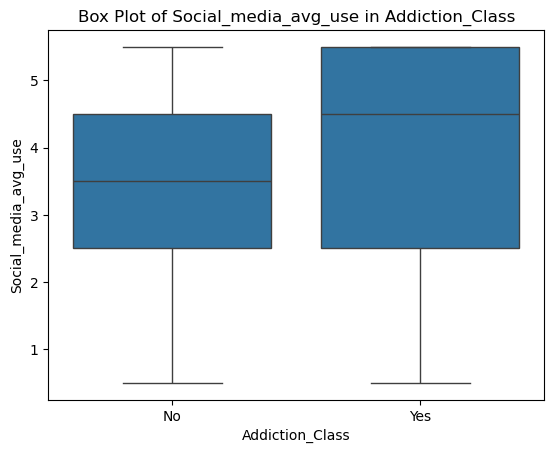

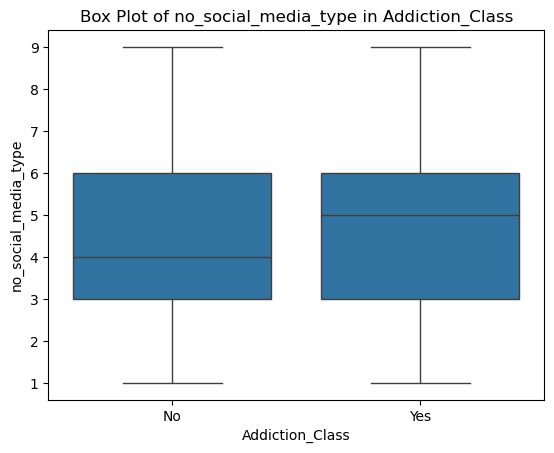

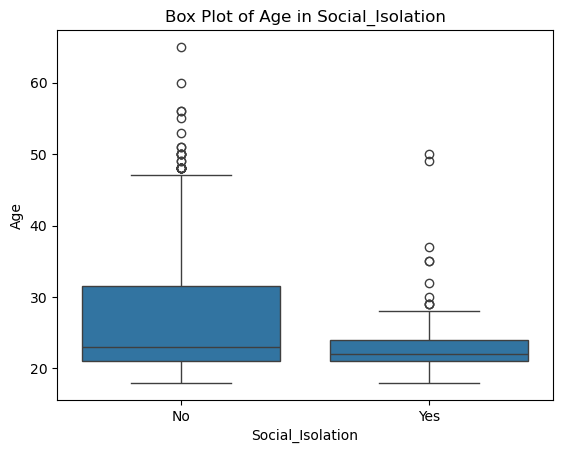

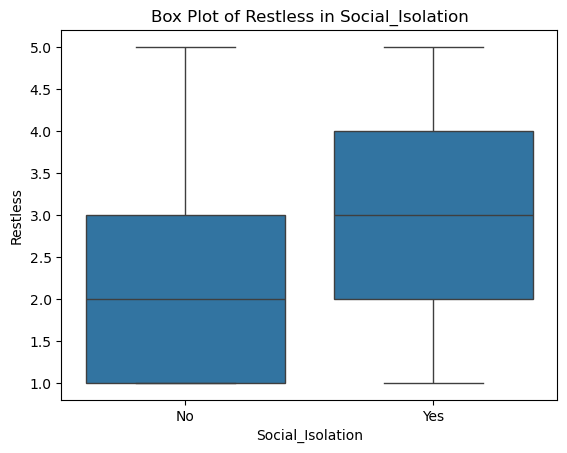

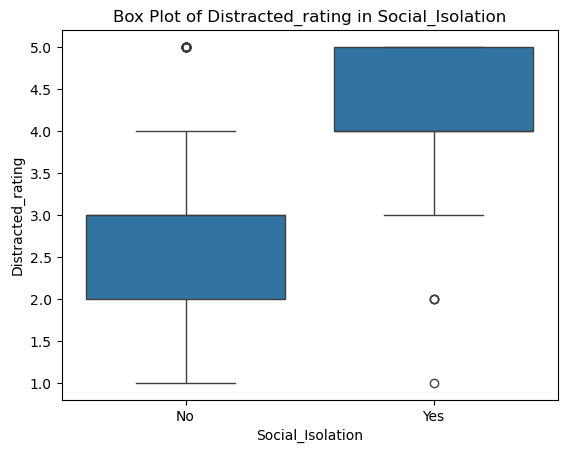

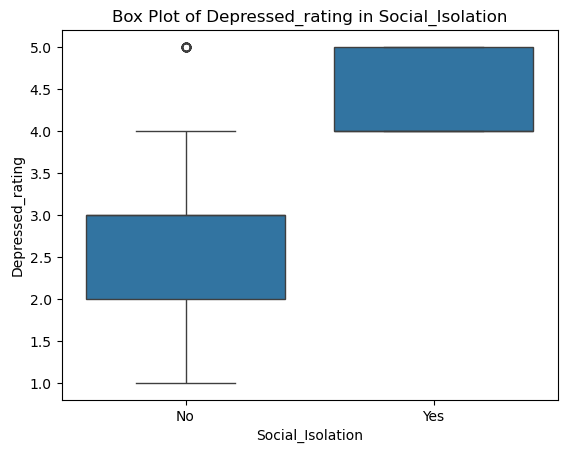

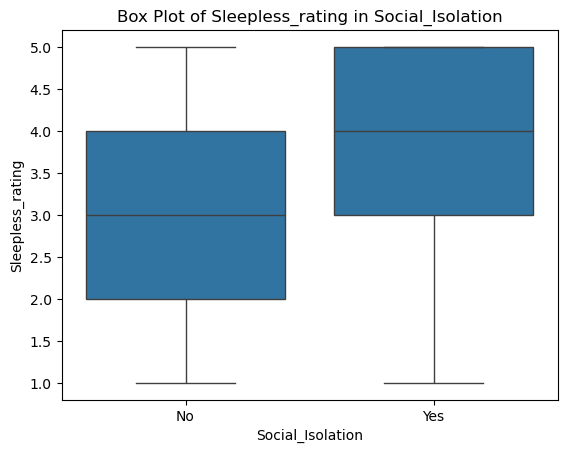

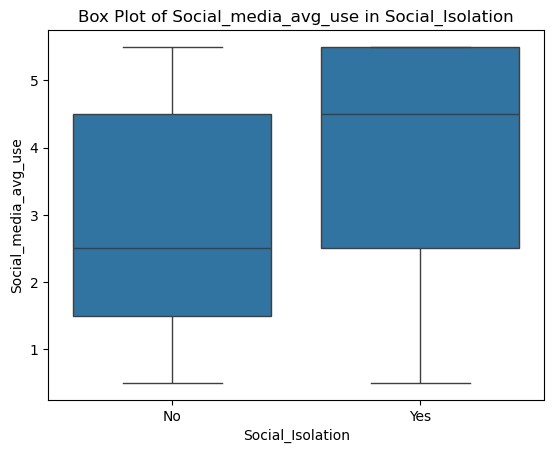

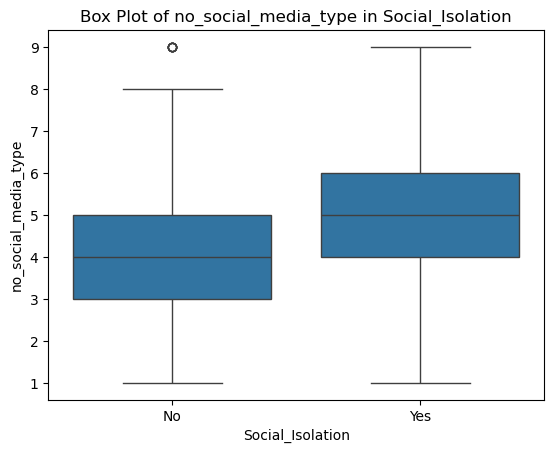

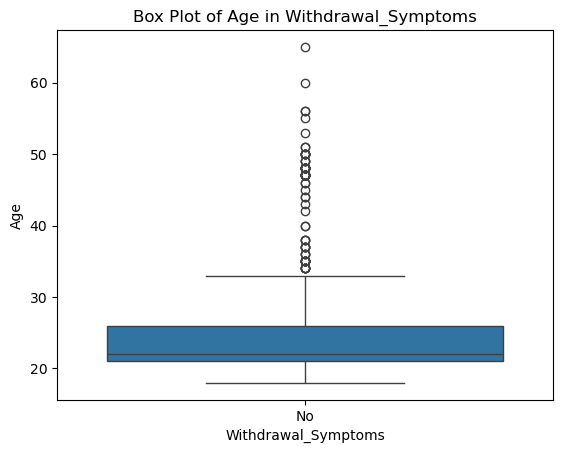

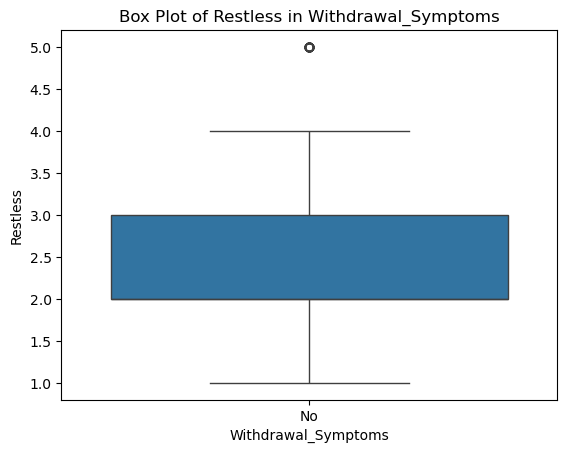

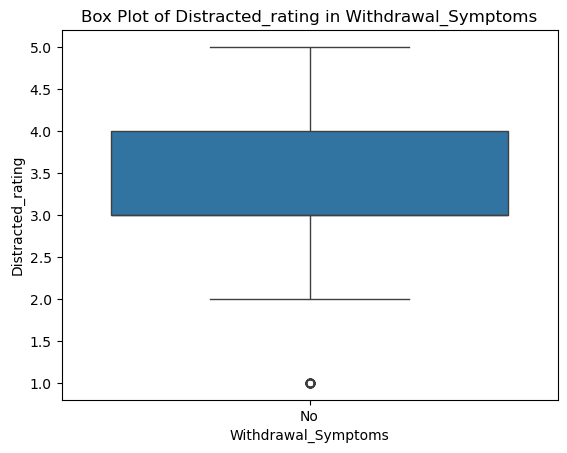

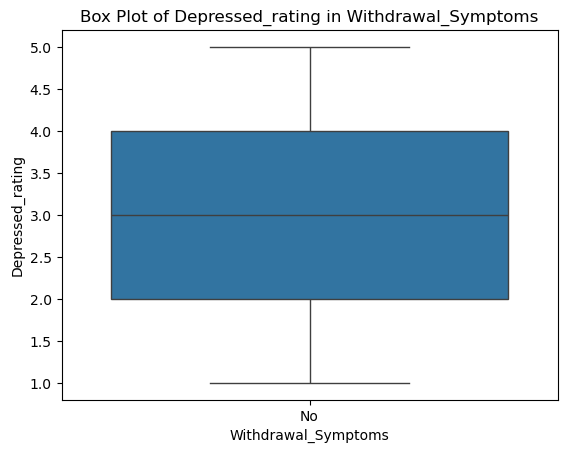

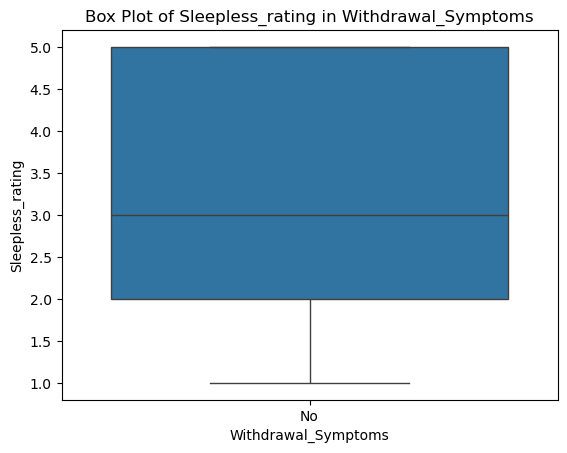

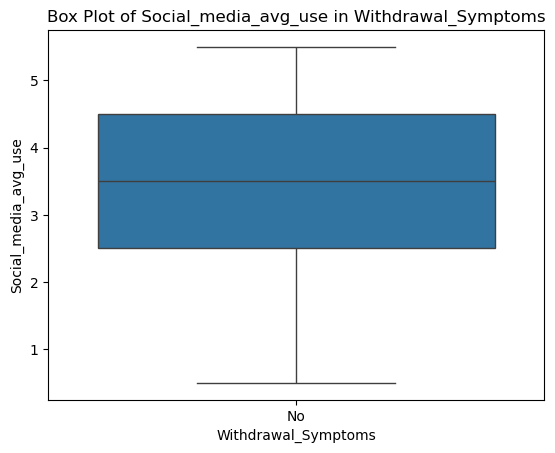

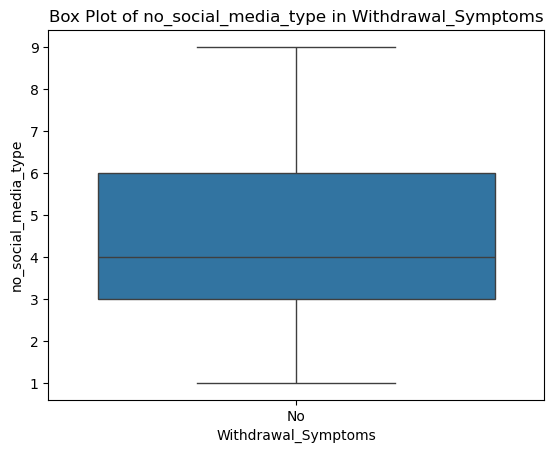

In [69]:
for cat in categorial_columns:
    for num in numerical_columns: 
        if cat=='Timestamp' or cat=='Social_media_type': continue
        sns.boxplot(x=cat,y=num,data=merged_df)
        plt.title('Box Plot of ' +num +' in ' +cat )
        plt.show()
    

/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_57056/3094465038.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()


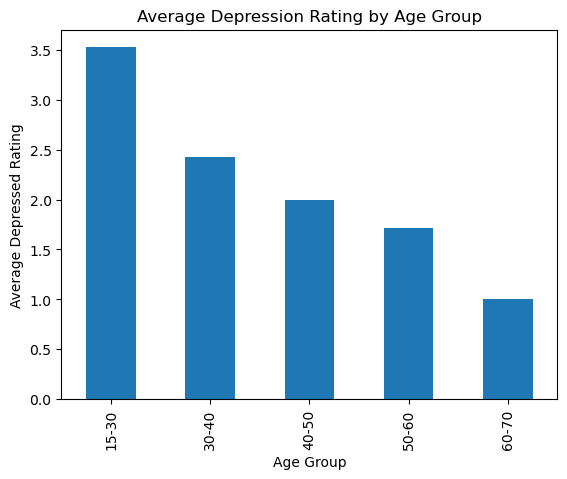

In [70]:
# Bar chart for Depression rating by age group
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 30, 40,50,60,70], labels=["15-30", "30-40","40-50","50-60","60-70"])
group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()
group_means.plot(kind='bar', title="Average Depression Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Depressed Rating")
plt.show()

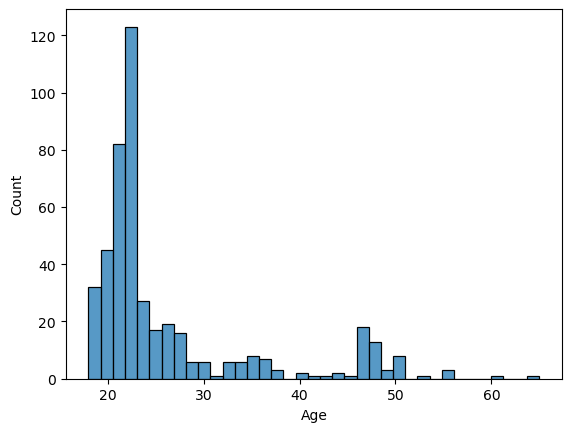

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_df['Age'])
plt.show()

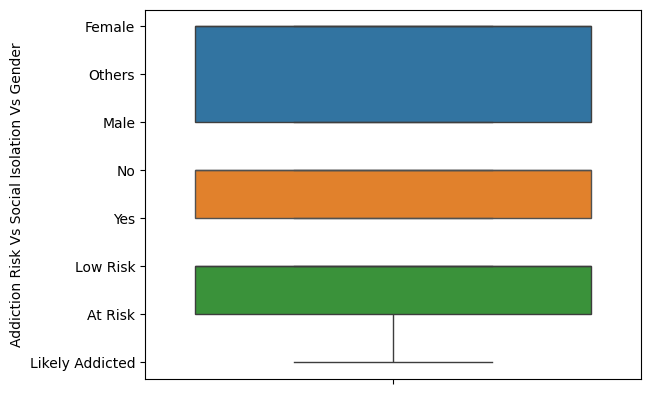

In [72]:
box = sns.boxplot(merged_df['Gender'])
box = sns.boxplot(merged_df['Social_Isolation'])
box = sns.boxplot(merged_df['Addiction_Risk'])
box.set(ylabel='Addiction Risk Vs Social Isolation Vs Gender')
plt.show()

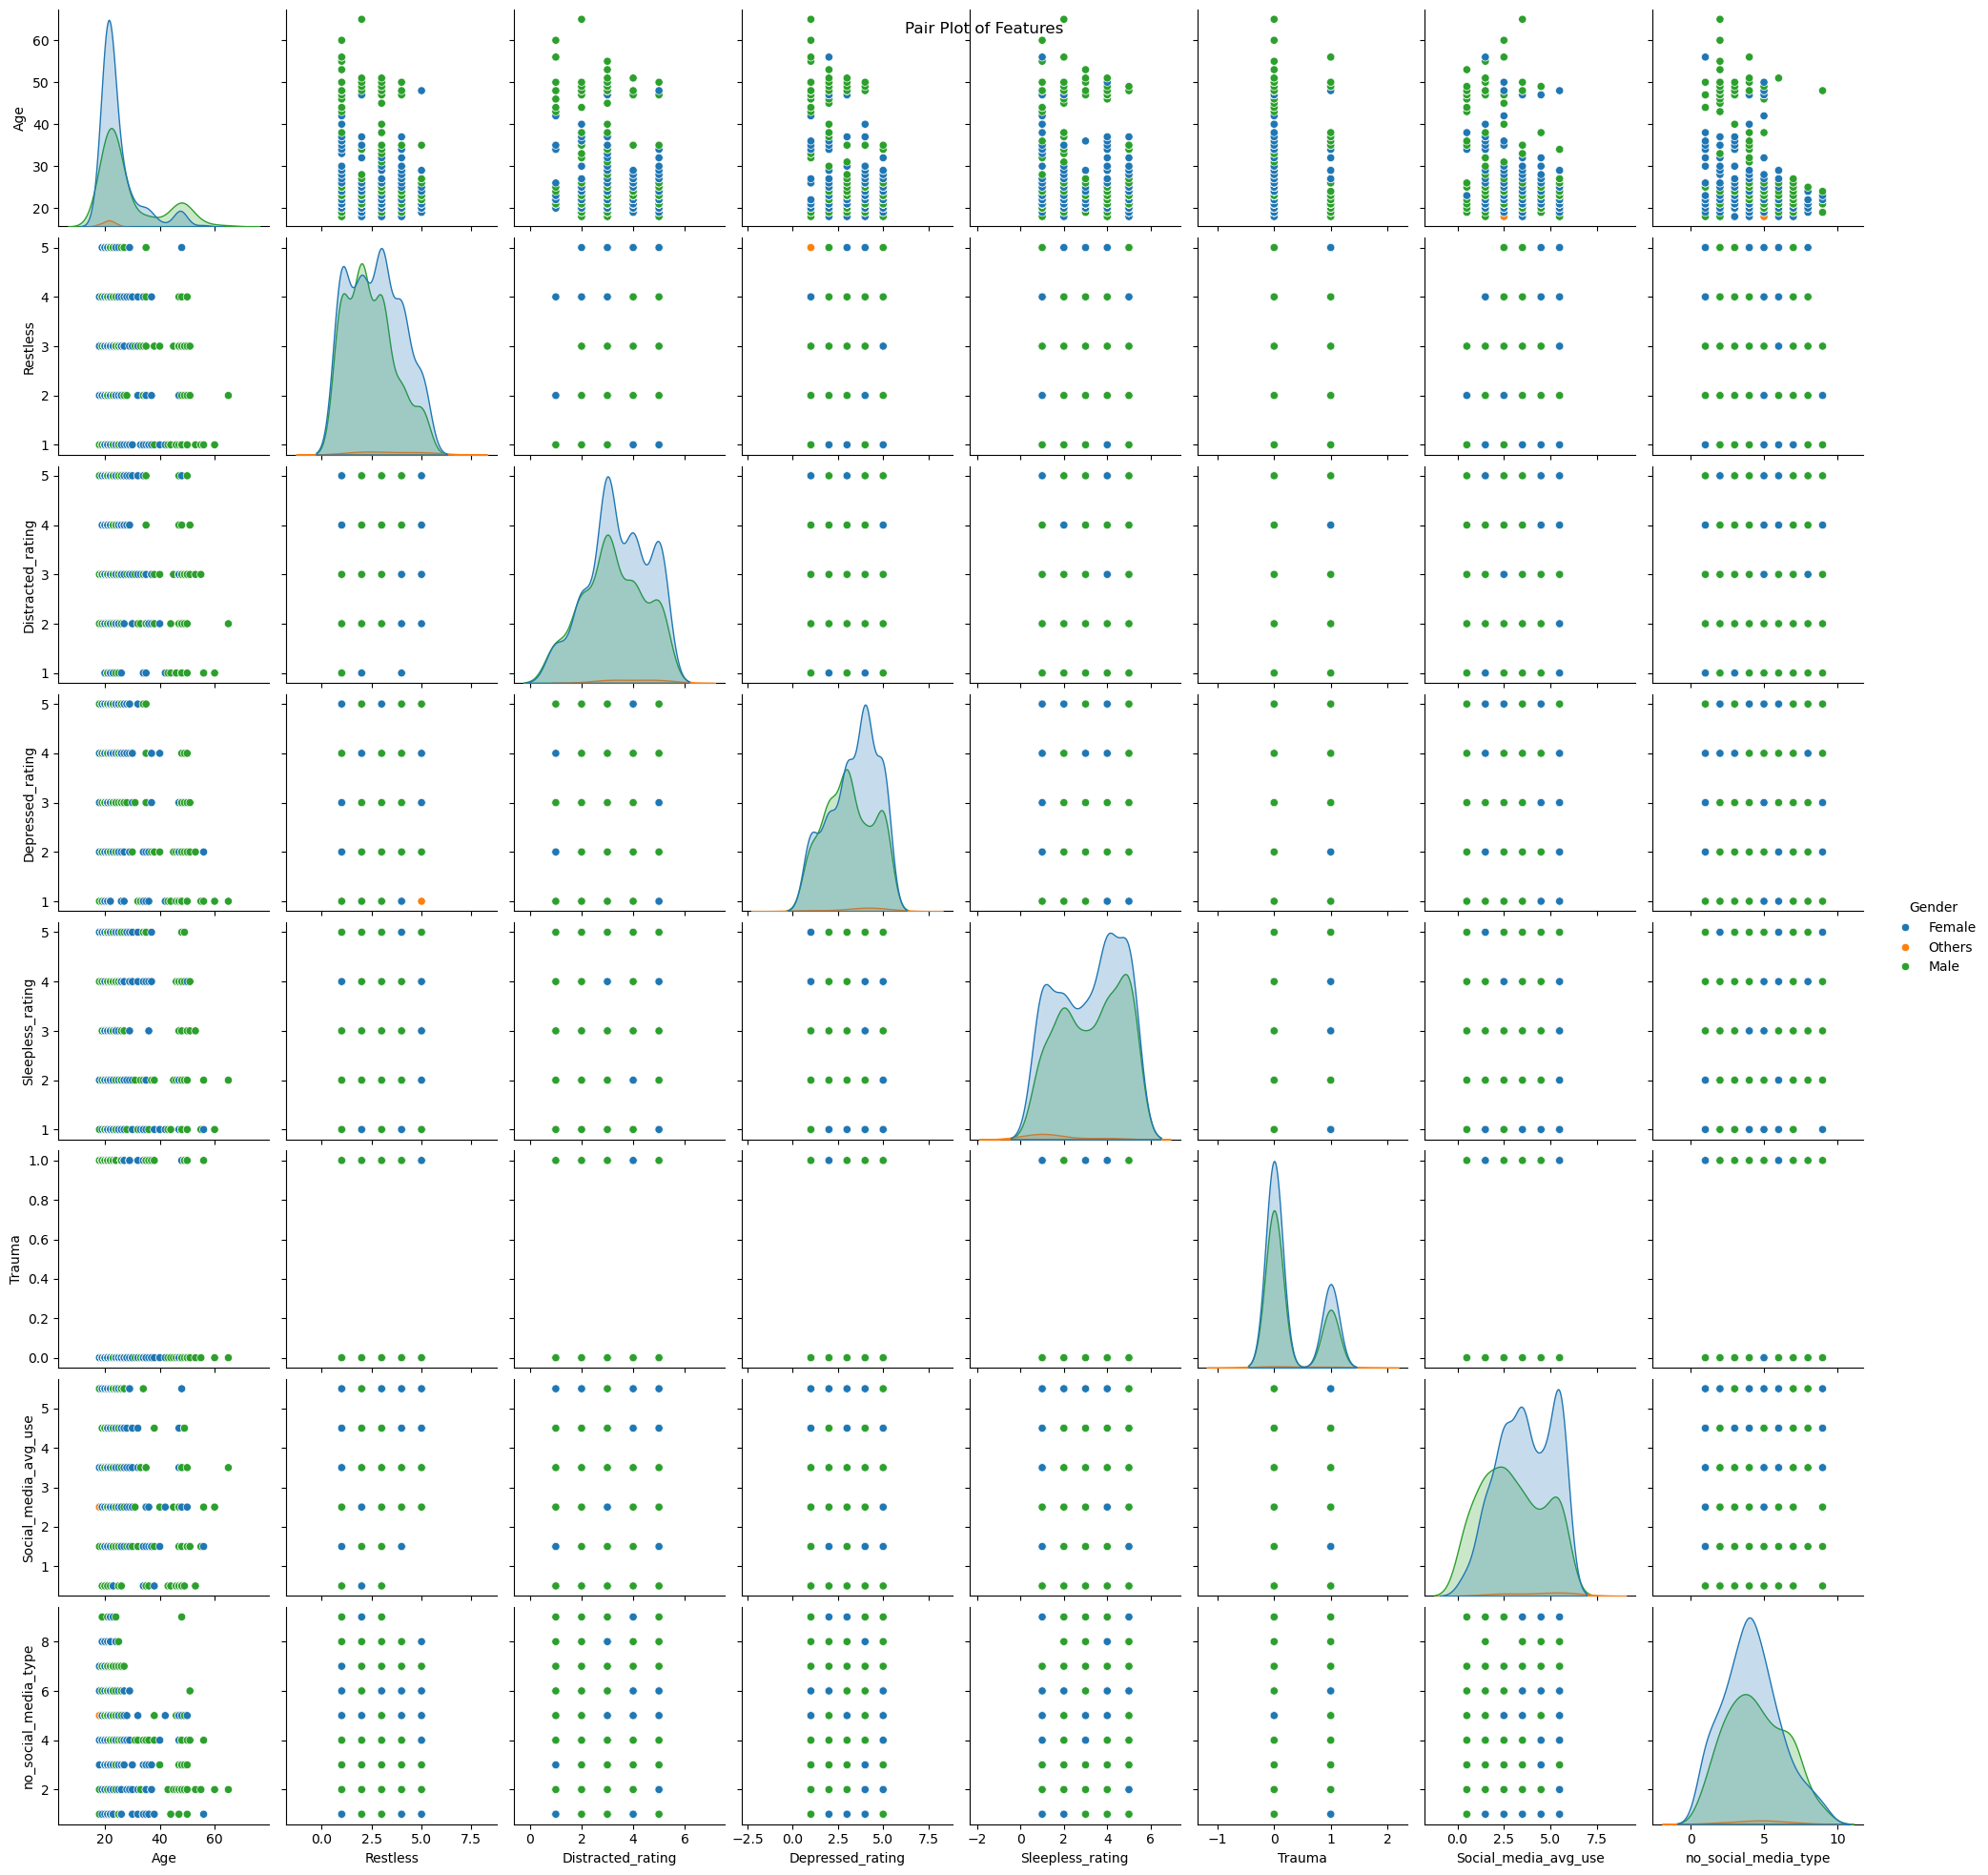

In [73]:
# Pairplot using Seaborn
sns.pairplot(merged_df, hue='Gender', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Features')
plt.show()

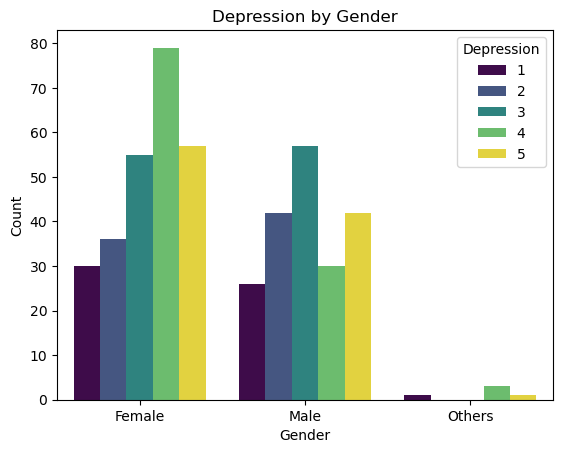

In [74]:
# Bar plot and gender relationship
plot_data=merged_df.groupby(['Gender','Depressed_rating'])['Depressed_rating'].count().reset_index(name='Count')
sns.barplot(data=plot_data, x='Gender', y='Count', hue='Depressed_rating', palette='viridis')
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms',
       'Social_media_avg_use', 'no_social_media_type', 'Age_Group'],
      dtype='object')
    Gender  Social_media_avg_use  Count
0   Female                   0.5      7
1   Female                   1.5     30
2   Female                   2.5     52
3   Female                   3.5     59
4   Female                   4.5     38
5   Female                   5.5     71
6     Male                   0.5     26
7     Male                   1.5     38
8     Male                   2.5     41
9     Male                   3.5     32
10    Male                   4.5     23
11    Male                   5.5     37
12  Others                   2.5      2
13  Others

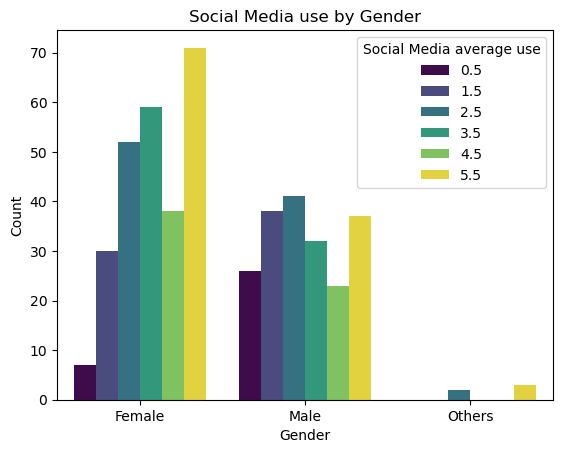

In [75]:
print(merged_df.columns)
plot_data=merged_df.groupby(['Gender','Social_media_avg_use'])['Social_media_avg_use'].count().reset_index(name='Count')
print(plot_data)
sns.barplot(data=plot_data, x='Gender', y='Count', hue='Social_media_avg_use', palette='viridis')
plt.title('Social Media use by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Social Media average use')
plt.show()

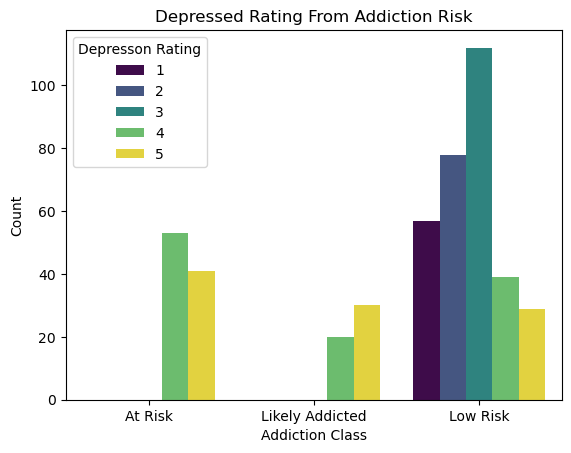

In [76]:
plot_data=merged_df.groupby(['Addiction_Risk','Depressed_rating'])['Depressed_rating'].count().reset_index(name='Count')
sns.barplot(data=plot_data, x='Addiction_Risk', y='Count', hue='Depressed_rating', palette='viridis')
plt.title('Depressed Rating From Addiction Risk')
plt.xlabel('Addiction Class')
plt.ylabel('Count')
plt.legend(title='Depresson Rating')
plt.show()

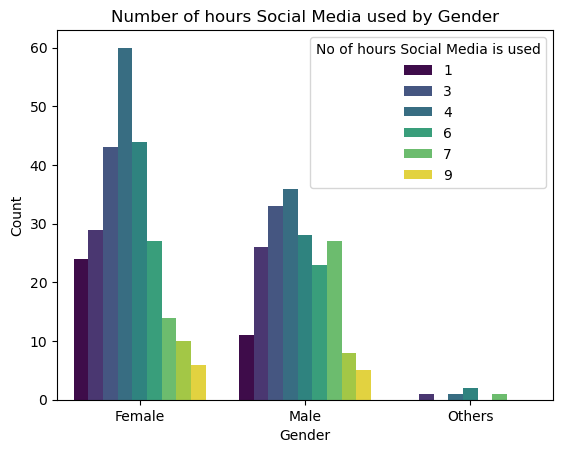

In [77]:
plot_data=merged_df.groupby(['Gender','no_social_media_type'])['no_social_media_type'].count().reset_index(name='Count')
sns.barplot(data=plot_data, x='Gender', y='Count', hue='no_social_media_type', palette='viridis')
plt.title('Number of hours Social Media used by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No of hours Social Media is used')
plt.show()

In [78]:
merged_df['Addiction_Risk'].unique()

array(['Low Risk', 'At Risk', 'Likely Addicted'], dtype=object)

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   459 non-null    int64   
 1   family_history        459 non-null    object  
 2   Timestamp             459 non-null    object  
 3   Gender                459 non-null    object  
 4   Relationship          459 non-null    object  
 5   Occupation            459 non-null    object  
 6   Social_media_use      459 non-null    object  
 7   Social_media_type     459 non-null    object  
 8   Social_media_usage    459 non-null    object  
 9   Restless              459 non-null    int64   
 10  Distracted_rating     459 non-null    int64   
 11  Depressed_rating      459 non-null    int64   
 12  Sleepless_rating      459 non-null    int64   
 13  Trauma                459 non-null    bool    
 14  Addiction_Risk        459 non-null    object  
 15  Addict

In [80]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(merged_df['Age'], merged_df['Depressed_rating'])

print(f"Spearman's correlation: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation exists between age and depressed rating.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Spearman's correlation: -0.2651743664069391
P-value: 7.961017470101323e-09
Reject the null hypothesis: Significant correlation exists between age and depressed rating.


In [81]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(merged_df['Social_media_avg_use'], merged_df['Depressed_rating'])

print(f"Spearman's correlation: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation exists between social media use and depressed rating.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Spearman's correlation: 0.3323248528759798
P-value: 2.6880214448421367e-13
Reject the null hypothesis: Significant correlation exists between social media use and depressed rating.


In [82]:
from scipy.stats import ttest_ind, levene
# Separate depression ratings based on family history
yes_group = merged_df[merged_df["family_history"] == "Yes"]["Depressed_rating"]
no_group = merged_df[merged_df["family_history"] == "No"]["Depressed_rating"]

# Check for equality of variances using Levene's Test
levene_stat, levene_p = levene(yes_group, no_group)
print(f"Levene's Test: Statistic = {levene_stat}, p-value = {levene_p}")

# Perform independent t-test
t_statistic, p_value = ttest_ind(yes_group, no_group, equal_var=(levene_p >= 0.05))

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in depression ratings based on family history.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in depression ratings based on family history.")


Levene's Test: Statistic = 0.7462989674797488, p-value = 0.3881037136826003
T-statistic: 0.8602224553939567
P-value: 0.39011747606388547
Fail to reject the null hypothesis: There is no significant difference in depression ratings based on family history.


In [83]:
from scipy.stats import ttest_ind, levene
# Separate depression ratings based on Addiction Risk
yes_group = merged_df[merged_df["Addiction_Risk"] == "Low Risk"]["Depressed_rating"]
no_group = merged_df[merged_df["Addiction_Risk"] == "Likely Addicted"]["Depressed_rating"]

# Check for equality of variances using Levene's Test
levene_stat, levene_p = levene(yes_group, no_group)
print(f"Levene's Test: Statistic = {levene_stat}, p-value = {levene_p}")

# Perform independent t-test
t_statistic, p_value = ttest_ind(yes_group, no_group, equal_var=(levene_p >= 0.05))

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: Addiction can cause the effect on mental health illness.")
else:
    print("Fail to reject the null hypothesis: Addiction Risk might not have any effect on mental health illness")


Levene's Test: Statistic = 20.17855670827821, p-value = 9.49332107387118e-06
T-statistic: -19.751385405260077
P-value: 2.6420113051118907e-44
Reject the null hypothesis: Addiction can cause the effect on mental health illness.


In [84]:
from scipy.stats import kruskal

# Separate Age by Addiction Risk
group1 = merged_df[merged_df["Addiction_Risk"] == "At Risk"]["Age"]
group2 = merged_df[merged_df["Addiction_Risk"] == "Likely Addicted"]["Age"]
group3 = merged_df[merged_df["Addiction_Risk"] == "Low Risk"]["Age"]


# Perform Kruskal-Wallis Test
h_statistic, p_value = kruskal(group1, group2, group3)

print(f"Kruskal-Wallis H Statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is relationship between age and Addiction Risk.")
else:
    print("Fail to reject the null hypothesis: No significant relation between age and addiction risk.")


Kruskal-Wallis H Statistic: 18.5892289897676
P-value: 9.191792534672735e-05
Reject the null hypothesis: There is relationship between age and Addiction Risk.
